# Predicting Machine Failure
The manufacturing team has been suffering consistent machine breakdowns and they want to be able to idenfy it before it's likely to happen through their sensor data. The existing machines have a number of sensors but they're not too sure which help identify failure.

# 1. Import Data

## Connect to SQL Database

In [1]:
# Import core dependencies
import os
import sqlite3
import pandas as pd
import numpy as np

In [7]:
# create variable that hodls database path
DB_PATH = os.path.join('database', 'iot.db') ; DB_PATH

'database/iot.db'

In [8]:
# Create connection and cursor to database
con = sqlite3.connect(DB_PATH)
cur = con.cursor()

## Check What Tables are Available

In [9]:
TABLE_STATEMENT = '''
    SELECT
        name
    FROM
        sqlite_master
    WHERE
        type='table'
'''

In [10]:
# To run table statement and get all the tables on our database 
res = cur.execute(TABLE_STATEMENT)
tables = res.fetchall()

In [11]:
res

In [12]:
tables

[('training',), ('scoring',)]

## Check What Fields are Available?

In [13]:
COLUMN_STATEMENT = '''
    PRAGMA table_info(training)
'''

In [14]:
res = cur.execute(COLUMN_STATEMENT)
columns = res.fetchall()

In [15]:
columns

[(0, 'Sensor 1', '', 0, None, 0),
 (1, 'Sensor 2', '', 0, None, 0),
 (2, 'Sensor 3', '', 0, None, 0),
 (3, 'Sensor 4', '', 0, None, 0),
 (4, 'Sensor 5', '', 0, None, 0),
 (5, 'Sensor 6', '', 0, None, 0),
 (6, 'Sensor 7', '', 0, None, 0),
 (7, 'Sensor 8', '', 0, None, 0),
 (8, 'Sensor 9', '', 0, None, 0),
 (9, 'Sensor 10', '', 0, None, 0),
 (10, 'Sensor 11', '', 0, None, 0),
 (11, 'Sensor 12', '', 0, None, 0),
 (12, 'Sensor 13', '', 0, None, 0),
 (13, 'Sensor 14', '', 0, None, 0),
 (14, 'Sensor 15', '', 0, None, 0),
 (15, 'Sensor 16', '', 0, None, 0),
 (16, 'Sensor 17', '', 0, None, 0),
 (17, 'Sensor 18', '', 0, None, 0),
 (18, 'Sensor 19', '', 0, None, 0),
 (19, 'Sensor 20', '', 0, None, 0),
 (20, 'Sensor 21', '', 0, None, 0),
 (21, 'Sensor 22', '', 0, None, 0),
 (22, 'Sensor 23', '', 0, None, 0),
 (23, 'Sensor 24', '', 0, None, 0),
 (24, 'Sensor 25', '', 0, None, 0),
 (25, 'Sensor 26', '', 0, None, 0),
 (26, 'Sensor 27', '', 0, None, 0),
 (27, 'Sensor 28', '', 0, None, 0),
 (28, 'Sens

## Get a Few Columns from DB

In [36]:
FILTERED_STATEMENT = '''
    SELECT
        "Sensor 1",
        "Sensor 2",
        "Sensor 3",
        "Sensor 4"
    FROM
        training
    WHERE
        "Sensor 3" > 0.2
'''

In [37]:
res = cur.execute(FILTERED_STATEMENT)
data = res.fetchall()

In [38]:
data[0]

(2.400996766, 0.410752315, 0.745568541, 1.467639639)

In [39]:
np.array(cur.description)[:, 0]

array(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4'], dtype=object)

In [40]:
# Covert it to a dataframe
cols = np.array(cur.description)[:, 0]
df = pd.DataFrame(data, columns = cols)
df.head()

Sensor 1  Sensor 2  Sensor 3  Sensor 4
0  2.400997  0.410752  0.745569  1.467640
1  0.675427  1.217458  1.491454  0.658602
2  0.295065  2.583267  1.397774  1.222003
3  1.745153  1.174935  2.206422  1.793800
4  2.090793  1.094919  0.785266  1.364575

In [41]:
df.shape

(5147, 4)

## Get All the Data

In [42]:
ALL_DATA_STATEMENT = '''
    SELECT
        *
    FROM
        training
'''

In [43]:
res = cur.execute(ALL_DATA_STATEMENT)
data = res.fetchall()

In [44]:
data

[(2.106008243,
  1.765493708,
  0.072487791,
  0.164543308,
  2.928143281,
  1.645433081,
  1.819062643,
  0.332034664,
  0.665590013,
  24.53137716,
  10.58011554,
  51.82575973,
  7.265688581,
  0.00336534,
  1.862963424,
  24.53137716,
  10.58011554,
  51.82575973,
  7.265688581,
  0.00336534,
  1.862963424,
  0.899205132,
  2.41374598,
  0.768242039,
  0.553937943,
  10.40384139,
  10.14908576,
  10.13511683,
  14.51391269,
  14.33239993,
  14.32251162,
  17.69371096,
  17.54512564,
  17.53704893,
  20.38335482,
  20.25451011,
  20.2475142,
  -1.395690241,
  9.457303367,
  0.998816867,
  1.899497097,
  2.928143281,
  -0.277097639,
  1.69112985,
  5.555419075,
  -1.541216973,
  2.928143281,
  -2.603314312,
  -2.606398028,
  1.079046158,
  0.945730337,
  -1.372151625,
  -1.372151625,
  -2.659794487,
  -1.400262464,
  1.780621155,
  15.31747601,
  0.526613755,
  0.182385075,
  0.075638735,
  5.547387971,
  6.656865565,
  0.526613755,
  0.923794793,
  1.147772662,
  6.656865565,
  7.98

In [45]:
cols = np.array(cur.description)[:,0]
cols

array(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5',
       'Sensor 6', 'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10',
       'Sensor 11', 'Sensor 12', 'Sensor 13', 'Sensor 14', 'Sensor 15',
       'Sensor 16', 'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20',
       'Sensor 21', 'Sensor 22', 'Sensor 23', 'Sensor 24', 'Sensor 25',
       'Sensor 26', 'Sensor 27', 'Sensor 28', 'Sensor 29', 'Sensor 30',
       'Sensor 31', 'Sensor 32', 'Sensor 33', 'Sensor 34', 'Sensor 35',
       'Sensor 36', 'Sensor 37', 'Sensor 38', 'Sensor 39', 'Sensor 40',
       'Sensor 41', 'Sensor 42', 'Sensor 43', 'Sensor 44', 'Sensor 45',
       'Sensor 46', 'Sensor 47', 'Sensor 48', 'Sensor 49', 'Sensor 50',
       'Sensor 51', 'Sensor 52', 'Sensor 53', 'Sensor 54', 'Sensor 55',
       'Sensor 56', 'Sensor 57', 'Sensor 58', 'Sensor 59', 'Sensor 60',
       'Sensor 61', 'Sensor 62', 'Sensor 63', 'Sensor 64', 'Sensor 65',
       'Sensor 66', 'Sensor 67', 'Sensor 68', 'Sensor 69', 'Sensor 70',
 

In [ ]:
# to close the connection to database from notebook since we have the data already
cur.close()
con.close()

## Convert SQL Result into a DataFrame

In [48]:
df = pd.DataFrame(data, columns = cols)
df.head()

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
0  2.106008  1.765494  0.072488  0.164543  2.928143   1.645433  1.819063   
1  2.400997  0.410752  0.745569  1.467640 -1.136906  14.676396  0.257288   
2  0.675427  1.217458  1.491454  0.658602  0.947287   6.586024  2.771511   
3  0.295065  2.583267  1.397774  1.222003  0.384710  12.220032  2.332653   
4  1.745153  1.174935  2.206422  1.793800  0.646555  17.937999  2.027426   

    Sensor 8  Sensor 9  Sensor 10  ...  Sensor 94  Sensor 95  Sensor 96  \
0   0.332035  0.665590  24.531377  ...   1.668703  -1.748165   0.075639   
1   0.892593  1.418290  18.658616  ...   1.835808  -1.923228   1.488724   
2   5.866576  1.928395  27.855573  ...   1.411937  -1.479172  -0.942776   
3  14.873609  3.130726  41.486420  ...  -0.843319   0.883477   0.568646   
4   2.042624  0.336993   9.490009  ...  -0.490529   0.513887  -0.244071   

   Sensor 97  Sensor 98  Sensor 99  Sensor 100  Sensor 101  Sensor 102  \
0   2.383862  -0.556234   0.152506   51.825760   49.461068   14.322512   
1   2.622583  -0.611936   1.178079    5.891962   42.905350   14.279731   
2   2.017053  -0.470646   1.153371   21.134473  -54.254697   14.196304   
3  -1.204742   0.281106   0.932500   33.129568   44.200473   14.168624   
4  -0.700755   0.163510   0.737156   45.813705   42.141305   14.189116   

   Machine Failure  
0          Running  
1          Running  
2          Running  
3          Running  
4          Running  

[5 rows x 103 columns]

# 2. Split Data into Train and Testing to Prevent Data Snooping Bias

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
train, test = train_test_split(df, stratify=df['Machine Failure'], test_size= 0.3, random_state = 1234)
print(f' train {train.shape}')
print(f' test {test.shape}')

 train (4571, 103)
 test (1959, 103)


# 3. Exploratory Data Analysis

## Bird's Eye Overview

In [59]:
#Update max columns to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# run this to see less rows or columns again
#pd.set_option('display.max_rows')

In [56]:
train.head()

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
1526  1.382209  0.959569  2.039691  1.631576  1.471266  16.315762 -0.123216   
2814  1.114661  1.753120  0.777757 -1.165778  1.167658 -11.657782  0.838125   
6488  0.919949 -0.244303  0.442553 -0.542031  0.603301  -5.420310  1.906050   
66    0.563256  0.441737 -0.355619 -0.392601  3.242510  -3.926010  1.755904   
6077  1.784603  1.021679  2.323915  0.556113 -1.850188   5.561133  1.123146   

      Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  Sensor 13  \
1526 -0.498342  1.487315  26.543901  -1.681403 -11.966185   8.271950   
2814 -3.917132  2.405440  13.810468  24.548010  -7.777302   1.905234   
6488 -0.214311  0.124462  10.368780   5.364259  11.428224   0.184390   
66   -2.863108  2.491936  27.802933  -2.486471  29.378841   8.901466   
6077 -0.006424 -0.006171   1.863274  54.731103  23.461976  -4.068363   

      Sensor 14  Sensor 15  Sensor 16  Sensor 17  Sensor 18  Sensor 19  \
1526   1.364552   0.740828  26.543901  -1.681403 -11.966185   8.271950   
2814   2.116446   2.311702  13.810468  24.548010  -7.777302   1.905234   
6488   0.214901   1.932328  10.368780   5.364259  11.428224   0.184390   
66     1.559120  -0.507055  27.802933  -2.486471  29.378841   8.901466   
6077  20.008716   1.726854   1.863274  54.731103  23.461976  -4.068363   

      Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  Sensor 25  \
1526   1.364552   0.740828   0.006143   1.029249   1.688247  -0.114838   
2814   2.116446   2.311702  -0.103996   3.296675   1.798160   1.997290   
6488   0.214901   1.932328   0.890976   2.327950  -0.493759   1.288856   
66     1.559120  -0.507055  -0.268085   1.183088   0.030663   2.501079   
6077  20.008716   1.726854   0.549149   3.110832   0.553980   1.685697   

      Sensor 26  Sensor 27  Sensor 28  Sensor 29  Sensor 30  Sensor 31  \
1526  10.103891  10.192126  10.051987  14.251942  14.314632  14.215192   
2814  10.684790  10.321340  10.357888  14.746573  14.485397  14.511462   
6488  10.380140  10.127771  10.197505  14.493973  14.314318  14.363741   
66    10.128316  10.059027  10.365254  14.274658  14.225580  14.443738   
6077  10.620175  10.169451  10.293319  14.693500  14.371101  14.459019   

      Sensor 32  Sensor 33  Sensor 34  Sensor 35  Sensor 36  Sensor 37  \
1526  17.439814  17.491081  17.409794  20.128993  20.173427  20.102989   
2814  17.909720  17.695293  17.716636  20.592590  20.406373  20.424883   
6488  17.674932  17.527911  17.568295  20.364949  20.237480  20.272468   
66    17.462788  17.422692  17.601269  20.152718  20.117984  20.272833   
6077  17.860845  17.596573  17.668448  20.545574  20.316255  20.378540   

      Sensor 38  Sensor 39  Sensor 40  Sensor 41  Sensor 42  Sensor 43  \
1526  13.478877  10.968783   0.855048   0.941854   1.471266   0.080731   
2814   5.172502   7.050766   1.598879  -0.457077   1.167658   0.196142   
6488   9.373816   0.960958  -0.170585   1.305511   0.603301  -1.896878   
66    -0.127307  -4.559210   1.925458   1.236734   3.242510   2.619100   
6077   9.489338   0.946418   2.784457   1.444751  -1.850188   1.117364   

      Sensor 44  Sensor 45  Sensor 46  Sensor 47  Sensor 48  Sensor 49  \
1526   1.921926   1.184856   0.111871   1.471266   0.183842   0.215007   
2814   2.545204  -0.853337  -0.104683   1.167658  -0.426005  -0.266440   
6488   1.550714  -0.134356  -1.494011   0.603301   0.395210  -2.316785   
66     1.614558   7.721321  10.502912   3.242510  32.651064  16.957559   
6077   0.485783  -7.443023  -2.986782  -1.850188  -4.040047  -1.450928   

      Sensor 50  Sensor 51  Sensor 52  Sensor 53  Sensor 54  Sensor 55  \
1526   0.007371   1.096878   0.228281   0.228281   0.001738   0.001846   
2814  -0.124795   0.705077   0.582921   0.582921   0.023444  -0.051291   
6488   1.069172   0.096096  -1.774619  -1.774619  -0.238033  -0.182329   
66    -0.321702  -0.455921  13.711568  13.711568   2.487176   2.011084   
6077   0.658978   0.094642  -1.004275  -1.004275  -0.09049

In [54]:
train['Machine Failure'].unique()

array(['Running', 'Failure'], dtype=object)

In [57]:
train.tail()

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
2710 -0.340178  1.294278  0.781184 -1.480923  0.068733 -14.809227  1.906972   
5934 -0.310678  1.856229  0.641760  0.546215  1.165328   5.462155  1.566315   
6495  3.317952  1.380904  0.702294  0.841608  1.849806   8.416081  1.665403   
2031  0.942987  1.208896  0.962969  0.537488  0.743051   5.374882 -0.321150   
4397  1.663042  1.619919  1.744460 -0.277390  1.098823  -2.773898  1.645747   

       Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  Sensor 13  \
2710 -17.471799  3.712036  -0.380248  22.159835  21.657676  -5.190124   
5934  -0.314224 -0.220368   7.411216  41.331922  26.189019  -1.294392   
6495   0.546900  0.234116  -6.652780  11.251962  15.287858  -8.326390   
2031   0.151796 -0.527638 -23.772690  15.107304  -4.427685 -16.886345   
4397  -0.705233  0.926894  19.475114  17.556165   4.856624   4.737557   

      Sensor 14  Sensor 15  Sensor 16  Sensor 17  Sensor 18  Sensor 19  \
2710   1.478616   1.756826  -0.380248  22.159835  21.657676  -5.190124   
5934   9.816893  -1.435316   7.411216  41.331922  26.189019  -1.294392   
6495   0.015674   0.998611  -6.652780  11.251962  15.287858  -8.326390   
2031   0.260846   1.422577 -23.772690  15.107304  -4.427685 -16.886345   
4397   0.570956   1.390825  19.475114  17.556165   4.856624   4.737557   

      Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  Sensor 25  \
2710   1.478616   1.756826   0.385086   0.454042   0.011809   2.168049   
5934   9.816893  -1.435316   0.088468   0.268201   2.861348   2.393097   
6495   0.015674   0.998611   0.614885  -0.127624   0.195180   0.606461   
2031   0.260846   1.422577  -0.738374   1.568036   0.155303   0.225995   
4397   0.570956   1.390825  -0.205478   0.583876   1.163955   0.208948   

      Sensor 26  Sensor 27  Sensor 28  Sensor 29  Sensor 30  Sensor 31  \
2710  10.032955  10.022683  10.254486  14.181475  14.174210  14.339056   
5934  10.016992  10.414198  10.295393  14.163627  14.447274  14.361870   
6495   9.994432   9.995523  10.012001  14.133685  14.134456  14.146114   
2031  10.199352  10.079293  10.080630  14.338578  14.253427  14.254373   
4397  10.046133  10.096468  10.031328  14.195375  14.231042  14.184901   

      Sensor 32  Sensor 33  Sensor 34  Sensor 35  Sensor 36  Sensor 37  \
2710  17.365721  17.359789  17.494644  20.050494  20.045356  20.162257   
5934  17.345793  17.578166  17.508041  20.028598  20.230178  20.169277   
6495  17.309922  17.310552  17.320073  19.987641  19.988187  19.996432   
2031  17.526062  17.456467  17.457239  20.217094  20.156792  20.157461   
4397  17.380810  17.409952  17.372256  20.066799  20.092046  20.059391   

      Sensor 38  Sensor 39  Sensor 40  Sensor 41  Sensor 42  Sensor 43  \
2710   5.133131   4.841805   2.212095  -0.560806   0.068733   2.398764   
5934   4.358964   3.087912   1.043529  -0.507114   1.165328   2.305146   
6495   2.250449   8.959334   3.542002   1.257048   1.849806   1.841352   
2031   0.914967   2.123617   0.921289   0.933361   0.743051   0.574835   
4397  -5.275374   3.267767   1.500796   2.070090   1.098823   2.440825   

      Sensor 44  Sensor 45  Sensor 46  Sensor 47  Sensor 48  Sensor 49  \
2710   0.751035  -0.085267  -0.092462   0.068733  -0.153613  -0.069442   
5934   0.519839  -0.616678  -1.362236   1.165328  -0.738968  -0.708143   
6495   0.595787   8.236199   4.281687   1.849806   9.035548   2.550972   
2031   1.581376   0.638946   0.398668   0.743051   0.580821   0.630444   
4397   0.843477   3.413804   5.552053   1.098823   7.028271   4.683030   

      Sensor 50  Sensor 51  Sensor 52  Sensor 53  Sensor 54  Sensor 55  \
2710   0.462104   0.484180   0.123826   0.123826  -0.015537   0.027705   
5934   0.106162   0.308791   1.396418   1.396418  -0.023214   0.045777   
6495   0.737862   0.895933   2.029336   2.029336   1.686384   1.341543   
2031  -0.886049   0.212362   0.675456   0.675456  -0.118626  -0.127096   
4397  -0.246573   0.326777   2.262235   2.262235  -0

In [60]:
train.dtypes

Sensor 1           float64
Sensor 2           float64
Sensor 3           float64
Sensor 4           float64
Sensor 5           float64
Sensor 6           float64
Sensor 7           float64
Sensor 8           float64
Sensor 9           float64
Sensor 10          float64
Sensor 11          float64
Sensor 12          float64
Sensor 13          float64
Sensor 14          float64
Sensor 15          float64
Sensor 16          float64
Sensor 17          float64
Sensor 18          float64
Sensor 19          float64
Sensor 20          float64
Sensor 21          float64
Sensor 22          float64
Sensor 23          float64
Sensor 24          float64
Sensor 25          float64
Sensor 26          float64
Sensor 27          float64
Sensor 28          float64
Sensor 29          float64
Sensor 30          float64
Sensor 31          float64
Sensor 32          float64
Sensor 33          float64
Sensor 34          float64
Sensor 35          float64
Sensor 36          float64
Sensor 37          float64
S

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4571 entries, 1526 to 4397
Columns: 103 entries, Sensor 1 to Machine Failure
dtypes: float64(102), object(1)
memory usage: 3.6+ MB


In [62]:
train.describe()

Sensor 1     Sensor 2     Sensor 3     Sensor 4     Sensor 5  \
count  4571.000000  4571.000000  4571.000000  4571.000000  4571.000000   
mean      1.017857     0.987795     0.997633     1.007020     0.986144   
std       0.979800     0.990494     0.998358     1.001622     1.024145   
min      -2.160874    -2.534693    -2.280546    -2.554940    -3.002302   
25%       0.358685     0.313978     0.336352     0.335395     0.301613   
50%       1.014828     0.960893     0.977988     1.003179     0.987688   
75%       1.659362     1.671354     1.682015     1.683223     1.674619   
max       4.584227     4.665697     4.532265     4.831581     4.903919   

          Sensor 6     Sensor 7     Sensor 8     Sensor 9    Sensor 10  \
count  4571.000000  4571.000000  4571.000000  4571.000000  4571.000000   
mean     10.070205     1.036881     1.638584     0.963613    14.714748   
std      10.016223     1.012838     4.391955     1.003892    15.213086   
min     -25.549395    -2.864472   -22.621893    -2.541184   -42.871762   
25%       3.353953     0.353887    -0.178626     0.298132     4.137603   
50%      10.031794     1.021159     0.481557     0.970244    14.853589   
75%      16.832226     1.712039     2.602621     1.630082    25.118375   
max      48.315807     4.609980    45.870523     4.811394    78.156453   

         Sensor 11    Sensor 12    Sensor 13     Sensor 14    Sensor 15  \
count  4571.000000  4571.000000  4571.000000  4.571000e+03  4571.000000   
mean     16.343000    14.908261     2.357374  2.984878e+00     1.007779   
std      16.072047    14.989871     7.606543  4.178067e+00     1.005145   
min     -39.816890   -34.983084   -26.435881  3.890000e-09    -2.575050   
25%       5.615995     5.022799    -2.931199  3.007895e-01     0.302650   
50%      16.207263    15.116622     2.426795  1.358196e+00     1.020512   
75%      27.126283    24.959691     7.559188  4.023912e+00     1.694346   
max      72.111833    76.091042    34.078226  3.857880e+01     4.489300   

         Sensor 16    Sensor 17    Sensor 18    Sensor 19     Sensor 20  \
count  4571.000000  4571.000000  4571.000000  4571.000000  4.571000e+03   
mean     14.714748    16.343000    14.908261     2.357374  2.984878e+00   
std      15.213086    16.072047    14.989871     7.606543  4.178067e+00   
min     -42.871762   -39.816890   -34.983084   -26.435881  3.890000e-09   
25%       4.137603     5.615995     5.022799    -2.931199  3.007895e-01   
50%      14.853589    16.207263    15.116622     2.426795  1.358196e+00   
75%      25.118375    27.126283    24.959691     7.559188  4.023912e+00   
max      78.156453    72.111833    76.091042    34.078226  3.857880e+01   

         Sensor 21    Sensor 22    Sensor 23    Sensor 24    Sensor 25  \
count  4571.000000  4571.000000  4571.000000  4571.000000  4571.000000   
mean      1.007779     1.005972     1.034620     1.012852     1.008781   
std       1.005145     0.996170     0.993661     1.010078     0.999609   
min      -2.575050    -2.711169    -2.553320    -2.844470    -3.126957   
25%       0.302650     0.331839     0.372892     0.330242     0.304760   
50%       1.020512     1.000547     1.041786     1.015427     1.021288   
75%       1.694346     1.672697     1.694372     1.694094     1.713540   
max       4.489300     4.801477     4.148014     4.776459     4.619857   

         Sensor 26    Sensor 27    Sensor 28    Sensor 29    Sensor 30  \
count  4571.000000  4571.000000  4571.000000  4571.000000  4571.000000   
mean     10.152158    10.152033    10.150611    14.286539    14.286461   
std       0.160932     0.129425     0.127920     0.147089     0.110368   
min       9.987492     9.890061     9.873010    14.106736    13.982753   
25%      10.027238    10.065891    10.064356    14.173530    14.212760   
50%      10.106250    10.121410    10.120705    14.253732    14.271555   
75%      10.225716    10.206345    10.206588    14.361742    14.345596   
max      11.016081    11.173490    11.091662    15.016726    15.0

In [63]:
train.describe(include= 'object')

Machine Failure
count             4571
unique               2
top            Running
freq              3946

## Take a Look at Distributions

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns

In [65]:
%matplotlib inline

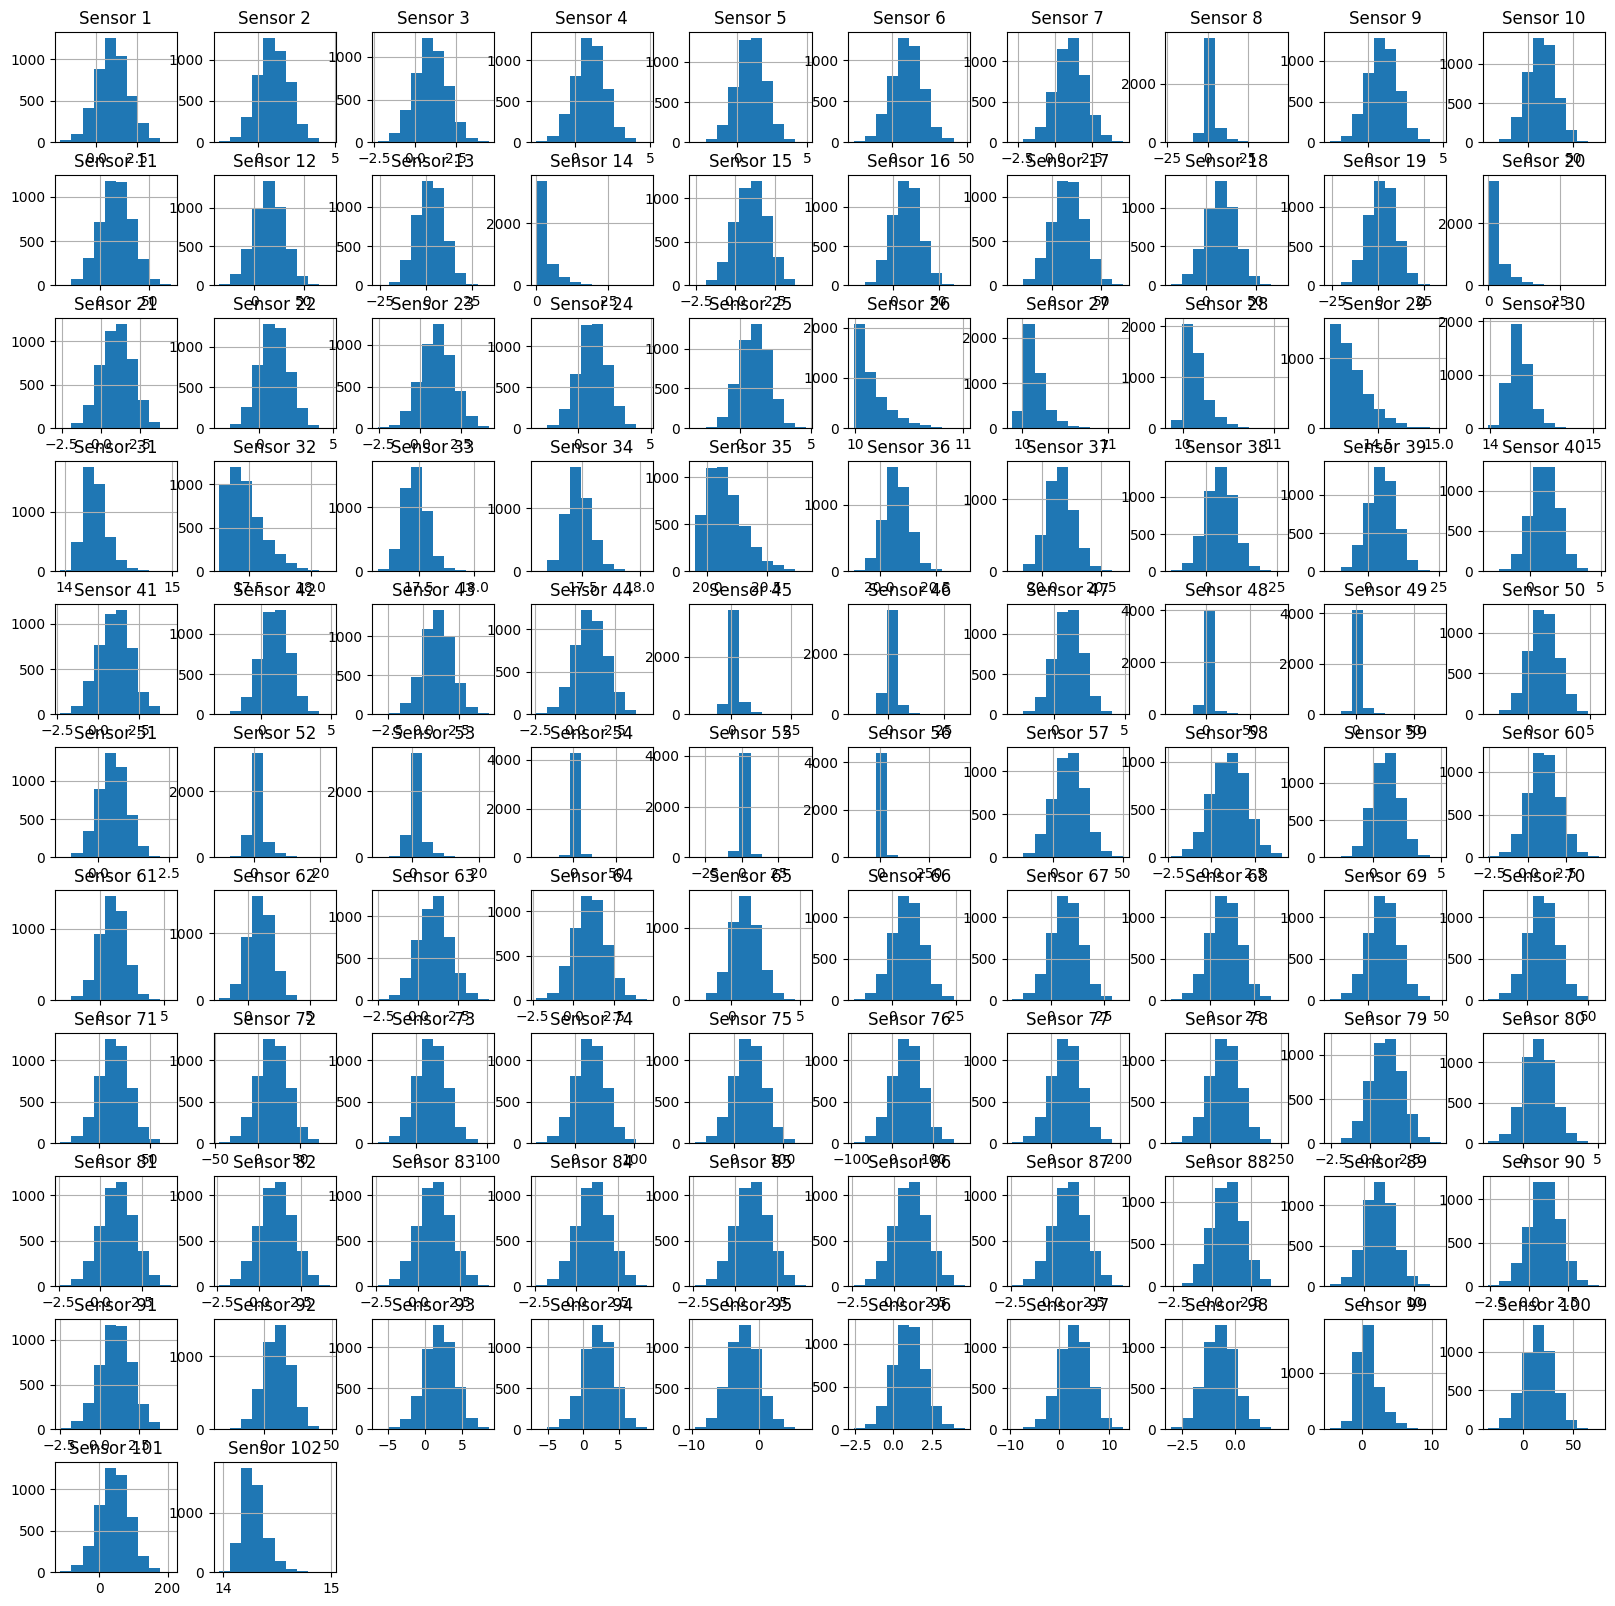

In [66]:
train.hist(figsize=(20, 20))
plt.show()

## View Correlation

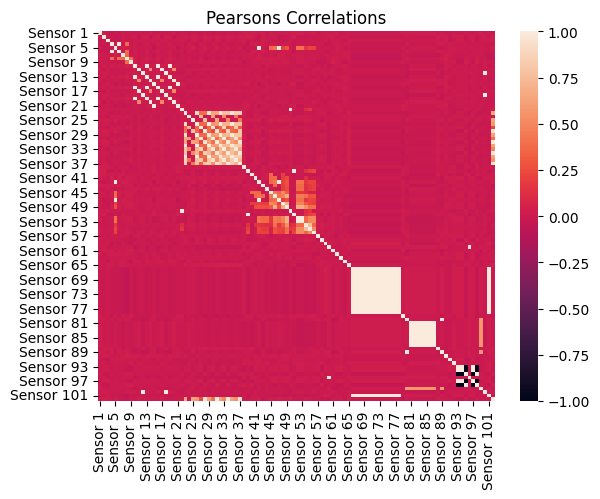

In [71]:
plt.title('Pearsons Correlations')
sns.heatmap(train.select_dtypes(exclude = 'object').corr())
plt.show()

In [72]:
temp = train.copy()
temp['OneHotTarget'] = temp['Machine Failure'].apply(lambda x:1 if x=='Failure' else 0)
temp.head()

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
1526  1.382209  0.959569  2.039691  1.631576  1.471266  16.315762 -0.123216   
2814  1.114661  1.753120  0.777757 -1.165778  1.167658 -11.657782  0.838125   
6488  0.919949 -0.244303  0.442553 -0.542031  0.603301  -5.420310  1.906050   
66    0.563256  0.441737 -0.355619 -0.392601  3.242510  -3.926010  1.755904   
6077  1.784603  1.021679  2.323915  0.556113 -1.850188   5.561133  1.123146   

      Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  Sensor 13  \
1526 -0.498342  1.487315  26.543901  -1.681403 -11.966185   8.271950   
2814 -3.917132  2.405440  13.810468  24.548010  -7.777302   1.905234   
6488 -0.214311  0.124462  10.368780   5.364259  11.428224   0.184390   
66   -2.863108  2.491936  27.802933  -2.486471  29.378841   8.901466   
6077 -0.006424 -0.006171   1.863274  54.731103  23.461976  -4.068363   

      Sensor 14  Sensor 15  Sensor 16  Sensor 17  Sensor 18  Sensor 19  \
1526   1.364552   0.740828  26.543901  -1.681403 -11.966185   8.271950   
2814   2.116446   2.311702  13.810468  24.548010  -7.777302   1.905234   
6488   0.214901   1.932328  10.368780   5.364259  11.428224   0.184390   
66     1.559120  -0.507055  27.802933  -2.486471  29.378841   8.901466   
6077  20.008716   1.726854   1.863274  54.731103  23.461976  -4.068363   

      Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  Sensor 25  \
1526   1.364552   0.740828   0.006143   1.029249   1.688247  -0.114838   
2814   2.116446   2.311702  -0.103996   3.296675   1.798160   1.997290   
6488   0.214901   1.932328   0.890976   2.327950  -0.493759   1.288856   
66     1.559120  -0.507055  -0.268085   1.183088   0.030663   2.501079   
6077  20.008716   1.726854   0.549149   3.110832   0.553980   1.685697   

      Sensor 26  Sensor 27  Sensor 28  Sensor 29  Sensor 30  Sensor 31  \
1526  10.103891  10.192126  10.051987  14.251942  14.314632  14.215192   
2814  10.684790  10.321340  10.357888  14.746573  14.485397  14.511462   
6488  10.380140  10.127771  10.197505  14.493973  14.314318  14.363741   
66    10.128316  10.059027  10.365254  14.274658  14.225580  14.443738   
6077  10.620175  10.169451  10.293319  14.693500  14.371101  14.459019   

      Sensor 32  Sensor 33  Sensor 34  Sensor 35  Sensor 36  Sensor 37  \
1526  17.439814  17.491081  17.409794  20.128993  20.173427  20.102989   
2814  17.909720  17.695293  17.716636  20.592590  20.406373  20.424883   
6488  17.674932  17.527911  17.568295  20.364949  20.237480  20.272468   
66    17.462788  17.422692  17.601269  20.152718  20.117984  20.272833   
6077  17.860845  17.596573  17.668448  20.545574  20.316255  20.378540   

      Sensor 38  Sensor 39  Sensor 40  Sensor 41  Sensor 42  Sensor 43  \
1526  13.478877  10.968783   0.855048   0.941854   1.471266   0.080731   
2814   5.172502   7.050766   1.598879  -0.457077   1.167658   0.196142   
6488   9.373816   0.960958  -0.170585   1.305511   0.603301  -1.896878   
66    -0.127307  -4.559210   1.925458   1.236734   3.242510   2.619100   
6077   9.489338   0.946418   2.784457   1.444751  -1.850188   1.117364   

      Sensor 44  Sensor 45  Sensor 46  Sensor 47  Sensor 48  Sensor 49  \
1526   1.921926   1.184856   0.111871   1.471266   0.183842   0.215007   
2814   2.545204  -0.853337  -0.104683   1.167658  -0.426005  -0.266440   
6488   1.550714  -0.134356  -1.494011   0.603301   0.395210  -2.316785   
66     1.614558   7.721321  10.502912   3.242510  32.651064  16.957559   
6077   0.485783  -7.443023  -2.986782  -1.850188  -4.040047  -1.450928   

      Sensor 50  Sensor 51  Sensor 52  Sensor 53  Sensor 54  Sensor 55  \
1526   0.007371   1.096878   0.228281   0.228281   0.001738   0.001846   
2814  -0.124795   0.705077   0.582921   0.582921   0.023444  -0.051291   
6488   1.069172   0.096096  -1.774619  -1.774619  -0.238033  -0.182329   
66    -0.321702  -0.455921  13.711568  13.711568   2.487176   2.011084   
6077   0.658978   0.094642  -1.004275  -1.004275  -0.09049

In [76]:
temp['OneHotTarget'].unique()

array([0, 1])

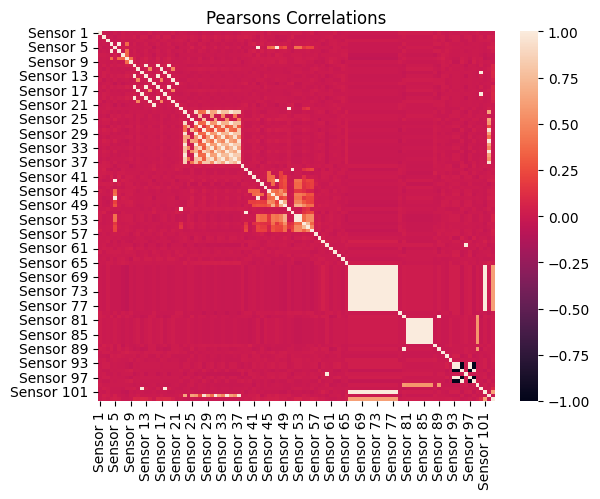

In [75]:
plt.title('Pearsons Correlations')
sns.heatmap(temp.select_dtypes(exclude = 'object').corr())
plt.show()

In [78]:
columns_to_analyse = [*list(temp.columns[64:77]), 'OneHotTarget']

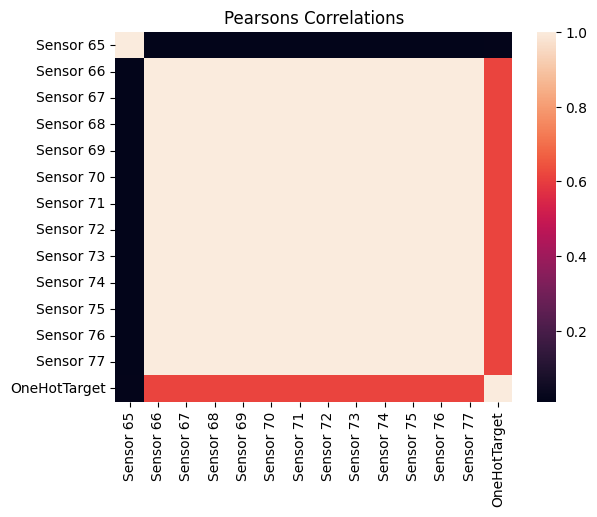

In [80]:
plt.title('Pearsons Correlations')
sns.heatmap(temp[columns_to_analyse].select_dtypes(exclude = 'object').corr())
plt.show()

## Is the target balanced?

<function matplotlib.pyplot.show(close=None, block=None)>

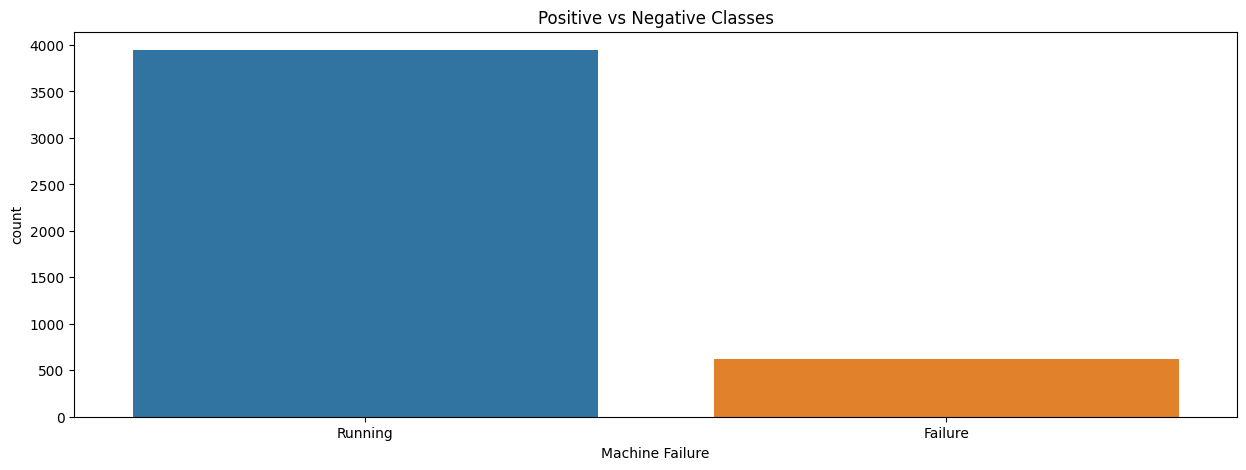

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(x='Machine Failure', data= train).set_title('Positive vs Negative Classes')
plt.show

# 4. Preprocessing

## Split Features and Targets

In [85]:
# Create the training variables
X_train = train.drop('Machine Failure', axis = 1)
y_train = train['Machine Failure']

In [87]:
X_train.head(3)

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
1526  1.382209  0.959569  2.039691  1.631576  1.471266  16.315762 -0.123216   
2814  1.114661  1.753120  0.777757 -1.165778  1.167658 -11.657782  0.838125   
6488  0.919949 -0.244303  0.442553 -0.542031  0.603301  -5.420310  1.906050   

      Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  Sensor 13  \
1526 -0.498342  1.487315  26.543901  -1.681403 -11.966185   8.271950   
2814 -3.917132  2.405440  13.810468  24.548010  -7.777302   1.905234   
6488 -0.214311  0.124462  10.368780   5.364259  11.428224   0.184390   

      Sensor 14  Sensor 15  Sensor 16  Sensor 17  Sensor 18  Sensor 19  \
1526   1.364552   0.740828  26.543901  -1.681403 -11.966185   8.271950   
2814   2.116446   2.311702  13.810468  24.548010  -7.777302   1.905234   
6488   0.214901   1.932328  10.368780   5.364259  11.428224   0.184390   

      Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  Sensor 25  \
1526   1.364552   0.740828   0.006143   1.029249   1.688247  -0.114838   
2814   2.116446   2.311702  -0.103996   3.296675   1.798160   1.997290   
6488   0.214901   1.932328   0.890976   2.327950  -0.493759   1.288856   

      Sensor 26  Sensor 27  Sensor 28  Sensor 29  Sensor 30  Sensor 31  \
1526  10.103891  10.192126  10.051987  14.251942  14.314632  14.215192   
2814  10.684790  10.321340  10.357888  14.746573  14.485397  14.511462   
6488  10.380140  10.127771  10.197505  14.493973  14.314318  14.363741   

      Sensor 32  Sensor 33  Sensor 34  Sensor 35  Sensor 36  Sensor 37  \
1526  17.439814  17.491081  17.409794  20.128993  20.173427  20.102989   
2814  17.909720  17.695293  17.716636  20.592590  20.406373  20.424883   
6488  17.674932  17.527911  17.568295  20.364949  20.237480  20.272468   

      Sensor 38  Sensor 39  Sensor 40  Sensor 41  Sensor 42  Sensor 43  \
1526  13.478877  10.968783   0.855048   0.941854   1.471266   0.080731   
2814   5.172502   7.050766   1.598879  -0.457077   1.167658   0.196142   
6488   9.373816   0.960958  -0.170585   1.305511   0.603301  -1.896878   

      Sensor 44  Sensor 45  Sensor 46  Sensor 47  Sensor 48  Sensor 49  \
1526   1.921926   1.184856   0.111871   1.471266   0.183842   0.215007   
2814   2.545204  -0.853337  -0.104683   1.167658  -0.426005  -0.266440   
6488   1.550714  -0.134356  -1.494011   0.603301   0.395210  -2.316785   

      Sensor 50  Sensor 51  Sensor 52  Sensor 53  Sensor 54  Sensor 55  \
1526   0.007371   1.096878   0.228281   0.228281   0.001738   0.001846   
2814  -0.124795   0.705077   0.582921   0.582921   0.023444  -0.051291   
6488   1.069172   0.096096  -1.774619  -1.774619  -0.238033  -0.182329   

      Sensor 56  Sensor 57  Sensor 58  Sensor 59  Sensor 60  Sensor 61  \
1526   0.057161   9.402169   2.727626   1.360505  -0.102864   1.930407   
2814   0.239583  17.280406   1.668045   2.203358   0.682722   0.674557   
6488   0.302632  -6.529273   2.817630   1.437235   0.890708  -0.619939   

      Sensor 62  Sensor 63  Sensor 64  Sensor 65  Sensor 66  Sensor 67  \
1526  -0.818318   0.125710   1.763584   0.185371  12.595135  15.114162   
2814   0.725812   1.600185   1.273691   2.517204  -5.784908  -6.941890   
6488   1.255193   2.166722   0.340220   0.894706  -4.591103  -5.509323   

      Sensor 68  Sensor 69  Sensor 70  Sensor 71  Sensor 72  Sensor 73  \
1526  18.136994  21.764393  26.117271  31.340726  37.608871  45.130645   
2814  -8.330268  -9.996321 -11.995586 -14.394703 -17.273643 -20.728372   
6488  -6.611188  -7.933426  -9.520111 -11.424133 -13.708959 -16.450751   

      Sensor 74  Sensor 75  Sensor 76  Sensor 77   Sensor 78  Sensor 79  \
1526  54.156774  64.988129  77.985755  93.582906  112.299487   0.838036   
2814 -24.874046 -29.848855 -35.818627 -42.982352  -51.578822   0.701181   
6488 -19.740901 -23.689082 -28.426898 -34.112278  -40.934733   1.745349   

      Sensor 80  Sensor 81  Sensor 82  Sensor 83  Sensor 84  Sensor 85  \
1526   1.828243   0.423469   0.423469   0.423469   0.42

In [86]:
# Create the test variables
X_test = test.drop('Machine Failure', axis = 1)
y_test = test['Machine Failure']

In [90]:
X_test.head(3)

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
5302  0.684659  0.718679  0.413477  1.444800 -0.425455  14.447998  1.742962   
4018  2.311796 -0.169086  1.890812  0.403397  0.130445   4.033965  1.383656   
4271  1.203332  0.340928  1.649064  0.949338  0.224799   9.493379  2.409803   

      Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  Sensor 13  \
5302  4.139520  0.986292  17.400322  52.785812  33.918801   3.700161   
4018  1.594003  1.713484  -6.854219  17.268124   3.005627  -8.427110   
4271  0.819411  0.214907  27.554296  24.595311  19.098889   8.777148   

      Sensor 14  Sensor 15  Sensor 16  Sensor 17  Sensor 18  Sensor 19  \
5302  18.306257   1.392777  17.400322  52.785812  33.918801   3.700161   
4018   0.528256   0.528287  -6.854219  17.268124   3.005627  -8.427110   
4271   2.130231  -0.362320  27.554296  24.595311  19.098889   8.777148   

      Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  Sensor 25  \
5302  18.306257   1.392777   2.623370   0.143009   0.891545  -0.980877   
4018   0.528256   0.528287  -1.100689   1.056265   2.424042   0.197573   
4271   2.130231  -0.362320   0.369212   0.522290   0.563019  -2.250737   

      Sensor 26  Sensor 27  Sensor 28  Sensor 29  Sensor 30  Sensor 31  \
5302  10.008170  10.046784  10.055105  14.152967  14.180299  14.186195   
4018  10.108015  10.340805  10.054616  14.255814  14.421807  14.218001   
4271  10.039675  10.041876  10.275607  14.188635  14.190193  14.356545   

      Sensor 32  Sensor 33  Sensor 34  Sensor 35  Sensor 36  Sensor 37  \
5302  17.333479  17.355802  17.360621  20.014807  20.034143  20.038317   
4018  17.443752  17.579669  17.412864  20.133076  20.250952  20.106320   
4271  17.373533  17.374805  17.510930  20.058962  20.060064  20.178082   

      Sensor 38  Sensor 39  Sensor 40  Sensor 41  Sensor 42  Sensor 43  \
5302  -0.383582  10.091315   0.842296   1.104977  -0.425455   1.164201   
4018   2.298403  10.603130  -0.425019  -1.804379   0.130445   0.043111   
4271   1.901596  14.921323  -0.035190   2.782874   0.224799   1.304951   

      Sensor 44  Sensor 45  Sensor 46  Sensor 47  Sensor 48  Sensor 49  \
5302   1.933322  -0.395979  -0.547313  -0.425455  -0.891260  -1.058131   
4018   1.365866   0.100038  -0.010147   0.130445   0.005891  -0.013860   
4271   0.711421  -0.022015   0.816362   0.224799  -0.020438   0.580777   

      Sensor 50  Sensor 51  Sensor 52  Sensor 53  Sensor 54  Sensor 55  \
5302   3.148044   1.009132  -0.957605  -0.957605  -3.361462  -3.042109   
4018  -1.320826   1.060313   0.007681   0.007681   0.019410  -0.010757   
4271   0.443054   1.492132   0.208697   0.208697   0.383949   0.137969   

      Sensor 56  Sensor 57  Sensor 58  Sensor 59  Sensor 60  Sensor 61  \
5302   0.925380   4.438109   0.875256  -0.081977   0.004838   1.197020   
4018   0.000063  18.186136   0.796085   0.390197   2.130767   2.343478   
4271   0.064989  27.610564   2.875912  -0.073962  -0.468989   2.663562   

      Sensor 62  Sensor 63  Sensor 64  Sensor 65  Sensor 66  Sensor 67  \
5302   1.886515  -0.345015   1.223116   1.467826   8.096340   9.715608   
4018   0.274691   0.321628   0.531646   0.869112   4.905941   5.887129   
4271   1.996525  -0.597975   1.983189   0.800108  -2.699000  -3.238800   

      Sensor 68  Sensor 69  Sensor 70  Sensor 71  Sensor 72  Sensor 73  \
5302  11.658729  13.990475  16.788570  20.146284  24.175541  29.010649   
4018   7.064555   8.477466  10.172959  12.207550  14.649061  17.578873   
4271  -3.886560  -4.663872  -5.596647  -6.715976  -8.059171  -9.671005   

      Sensor 74  Sensor 75  Sensor 76  Sensor 77  Sensor 78  Sensor 79  \
5302  34.812779  41.775335  50.130402  60.156482  72.187779   1.277752   
4018  21.094647  25.313577  30.376292  36.451550  43.741860  -0.579075   
4271 -11.605206 -13.926248 -16.711497 -20.053797 -24.064556   0.943372   

      Sensor 80  Sensor 81  Sensor 82  Sensor 83  Sensor 84  Sensor 85  \
5302   2.100997   0.042054   0.042054   0.042054   0.042054

## Rebalance Data

In [91]:
!pip install imblearn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [93]:
!pip list

Package                   Version
------------------------- -----------
altair                    5.0.1
annotated-types           0.5.0
anyio                     3.7.1
appnope                   0.1.3
asttokens                 2.2.1
attrs                     23.1.0
backcall                  0.2.0
blinker                   1.6.2
cachetools                5.3.1
certifi                   2023.5.7
charset-normalizer        3.2.0
click                     8.1.4
comm                      0.1.3
contourpy                 1.1.0
cycler                    0.11.0
dacite                    1.8.1
debugpy                   1.6.7
decorator                 5.1.1
dill                      0.3.6
exceptiongroup            1.1.2
executing                 1.2.0
fastapi                   0.100.0
fonttools                 4.40.0
gitdb                     4.0.10
GitPython                 3.1.32
graphviz                  0.20.1
h11                       0.14.0
htmlmin                   0.1.12
idna               

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
# Balance data using SMOTE
sm = SMOTE(random_state = 1234)
X_train, y_train = sm.fit_resample(X_train, y_train)

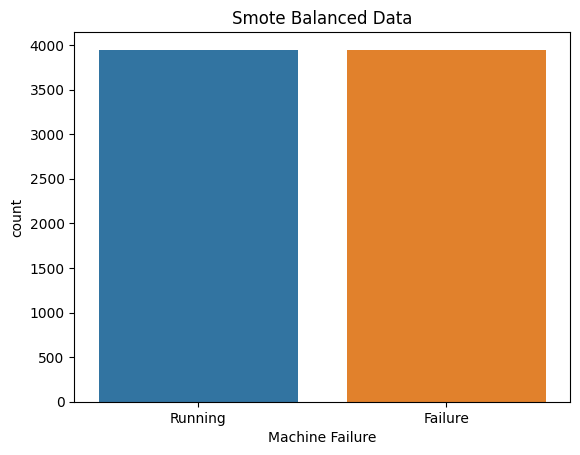

In [97]:
# Viz balanced data
sns.countplot(x= y_train).set_title('Smote Balanced Data')
plt.show()

# 5. Reducing Dimensionality

## Training a PCA Model

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [99]:
# Scale data prior to applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)

In [100]:
X_train.describe()

Sensor 1     Sensor 2     Sensor 3     Sensor 4     Sensor 5  \
count  7892.000000  7892.000000  7892.000000  7892.000000  7892.000000   
mean      1.005351     1.008436     0.998104     1.035866     1.005559   
std       0.900684     0.921386     0.915906     0.934729     0.953965   
min      -2.160874    -2.534693    -2.280546    -2.554940    -3.002302   
25%       0.412466     0.397034     0.377193     0.415902     0.375562   
50%       1.019625     0.995593     0.975366     1.056272     1.016703   
75%       1.585682     1.642478     1.612614     1.664477     1.627275   
max       4.584227     4.665697     4.532265     4.831581     4.903919   

          Sensor 6     Sensor 7     Sensor 8     Sensor 9    Sensor 10  \
count  7892.000000  7892.000000  7892.000000  7892.000000  7892.000000   
mean     10.358662     1.027593     1.539638     0.948951    15.963731   
std       9.347287     0.935297     3.923698     0.939930    14.845138   
min     -25.549395    -2.864472   -22.621893    -2.541184   -42.871762   
25%       4.159015     0.400818    -0.164394     0.335727     5.679341   
50%      10.562723     1.014651     0.600496     0.958214    16.218020   
75%      16.644765     1.650331     2.579761     1.544447    26.137961   
max      48.315807     4.609980    45.870523     4.811394    78.156453   

         Sensor 11    Sensor 12    Sensor 13     Sensor 14    Sensor 15  \
count  7892.000000  7892.000000  7892.000000  7.892000e+03  7892.000000   
mean     17.601195    16.596000     2.981866  3.046269e+00     0.988862   
std      15.534984    14.481445     7.422569  4.074067e+00     0.950607   
min     -39.816890   -34.983084   -26.435881  3.890000e-09    -2.575050   
25%       7.127990     7.202818    -2.160330  3.740278e-01     0.340927   
50%      17.627479    16.608362     3.109010  1.405426e+00     1.003241   
75%      28.156558    26.432674     8.068981  4.140267e+00     1.632192   
max      72.111833    76.091042    34.078226  3.857880e+01     4.489300   

         Sensor 16    Sensor 17    Sensor 18    Sensor 19     Sensor 20  \
count  7892.000000  7892.000000  7892.000000  7892.000000  7.892000e+03   
mean     15.963731    17.601195    16.596000     2.981866  3.046269e+00   
std      14.845138    15.534984    14.481445     7.422569  4.074067e+00   
min     -42.871762   -39.816890   -34.983084   -26.435881  3.890000e-09   
25%       5.679341     7.127990     7.202818    -2.160330  3.740278e-01   
50%      16.218020    17.627479    16.608362     3.109010  1.405426e+00   
75%      26.137961    28.156558    26.432674     8.068981  4.140267e+00   
max      78.156453    72.111833    76.091042    34.078226  3.857880e+01   

         Sensor 21    Sensor 22    Sensor 23    Sensor 24    Sensor 25  \
count  7892.000000  7892.000000  7892.000000  7892.000000  7892.000000   
mean      0.988862     1.018869     1.030141     0.973747     1.002232   
std       0.950607     0.931048     0.918125     0.933913     0.920089   
min      -2.575050    -2.711169    -2.553320    -2.844470    -3.126957   
25%       0.340927     0.414823     0.434237     0.353083     0.378338   
50%       1.003241     1.017789     1.029290     0.977838     1.019990   
75%       1.632192     1.624097     1.625132     1.588694     1.623072   
max       4.489300     4.801477     4.148014     4.776459     4.619857   

         Sensor 26    Sensor 27    Sensor 28    Sensor 29    Sensor 30  \
count  7892.000000  7892.000000  7892.000000  7892.000000  7892.000000   
mean     10.150703    10.147552    10.149151    14.285346    14.283104   
std       0.148956     0.117117     0.117300     0.136124     0.100450   
min       9.987492     9.890061     9.873010    14.106736    13.982753   
25%      10.038874    10.070362    10.070243    14.184918    14.217002   
50%      10.109994    10.122125    10.121877    14.255935    14.271631   
75%      10.219977    10.198720    10.200430    14.355026    14.338096   
max      11.016081    11.173490    11.091662    15.016726    15.0

In [104]:
temp_scaled_df = pd.DataFrame(scaled_data)
temp_scaled_df.describe()

0             1             2             3             4    \
count  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03   
mean  -2.160799e-17 -2.340866e-17 -1.181687e-16  6.122264e-17  1.206446e-16   
std    1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min   -3.515579e+00 -3.845679e+00 -3.579908e+00 -3.841792e+00 -4.201532e+00   
25%   -6.583024e-01 -6.636097e-01 -6.779631e-01 -6.632984e-01 -6.604401e-01   
50%    1.584948e-02 -1.393945e-02 -2.482697e-02  2.183235e-02  1.168272e-02   
75%    6.443632e-01  6.881833e-01  6.709745e-01  6.725482e-01  6.517591e-01   
max    3.973761e+00  3.969557e+00  3.858896e+00  4.061023e+00  4.086740e+00   

                5             6             7             8             9    \
count  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03   
mean   1.080399e-17  9.858645e-17 -5.401997e-18  5.221931e-17 -1.224453e-16   
std    1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min   -3.841792e+00 -4.161579e+00 -6.158237e+00 -3.713421e+00 -3.963535e+00   
25%   -6.632984e-01 -6.701770e-01 -4.343200e-01 -6.524550e-01 -6.928222e-01   
50%    2.183235e-02 -1.383801e-02 -2.393664e-01  9.856393e-03  1.713052e-02   
75%    6.725482e-01  6.658612e-01  2.651041e-01  6.335938e-01  6.854011e-01   
max    4.061023e+00  3.830458e+00  1.129896e+01  4.109549e+00  4.189699e+00   

                10            11            12            13            14   \
count  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03   
mean  -1.224453e-16 -1.512559e-16 -4.321598e-17 -1.800666e-17  6.572430e-17   
std    1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min   -3.696285e+00 -3.561962e+00 -3.963535e+00 -7.477693e-01 -3.749329e+00   
25%   -6.742118e-01 -6.486768e-01 -6.928222e-01 -6.559565e-01 -6.816443e-01   
50%    1.691982e-03  8.537181e-04  1.713052e-02 -4.027787e-01  1.512693e-02   
75%    6.795006e-01  6.793036e-01  6.854011e-01  2.685444e-01  6.768006e-01   
max    3.509118e+00  4.108624e+00  4.189699e+00  8.722189e+00  3.682553e+00   

                15            16            17            18            19   \
count  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03   
mean  -1.224453e-16 -1.224453e-16 -1.512559e-16 -4.321598e-17 -1.800666e-17   
std    1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min   -3.963535e+00 -3.696285e+00 -3.561962e+00 -3.963535e+00 -7.477693e-01   
25%   -6.928222e-01 -6.742118e-01 -6.486768e-01 -6.928222e-01 -6.559565e-01   
50%    1.713052e-02  1.691982e-03  8.537181e-04  1.713052e-02 -4.027787e-01   
75%    6.854011e-01  6.795006e-01  6.793036e-01  6.854011e-01  2.685444e-01   
max    4.189699e+00  3.509118e+00  4.108624e+00  4.189699e+00  8.722189e+00   

                20            21            22            23            24   \
count  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03   
mean   6.572430e-17  4.861798e-17 -1.233456e-16 -1.296479e-16  1.116413e-16   
std    1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min   -3.749329e+00 -4.006533e+00 -3.903267e+00 -4.088666e+00 -4.488100e+00   
25%   -6.816443e-01 -6.488213e-01 -6.490850e-01 -6.646268e-01 -6.781232e-01   
50%    1.512693e-02 -1.159798e-03 -9.274950e-04  4.380131e-03  1.930058e-02   
75%    6.768006e-01  6.500915e-01  6.480908e-01  6.585039e-01  6.748026e-01   
max    3.682553e+00  4.063000e+00  3.396128e+00  4.072062e+00  3.932069e+00   

                25            26            27            28            29   \
count  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03  7.892000e+03   
mean  -5.204825e-15 -7.310703e-15  6.626450e-15 -1.325830e-14  1.108130e-14   
std    1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00   
min   -1.095767e+00 -2.198722e+00 -2.354297e+00 -1.312198e+00 -2.990257e+00   
25%   -7.508011e-01 -6.591292e-01 -6.727458e-01 -7.378141e-01

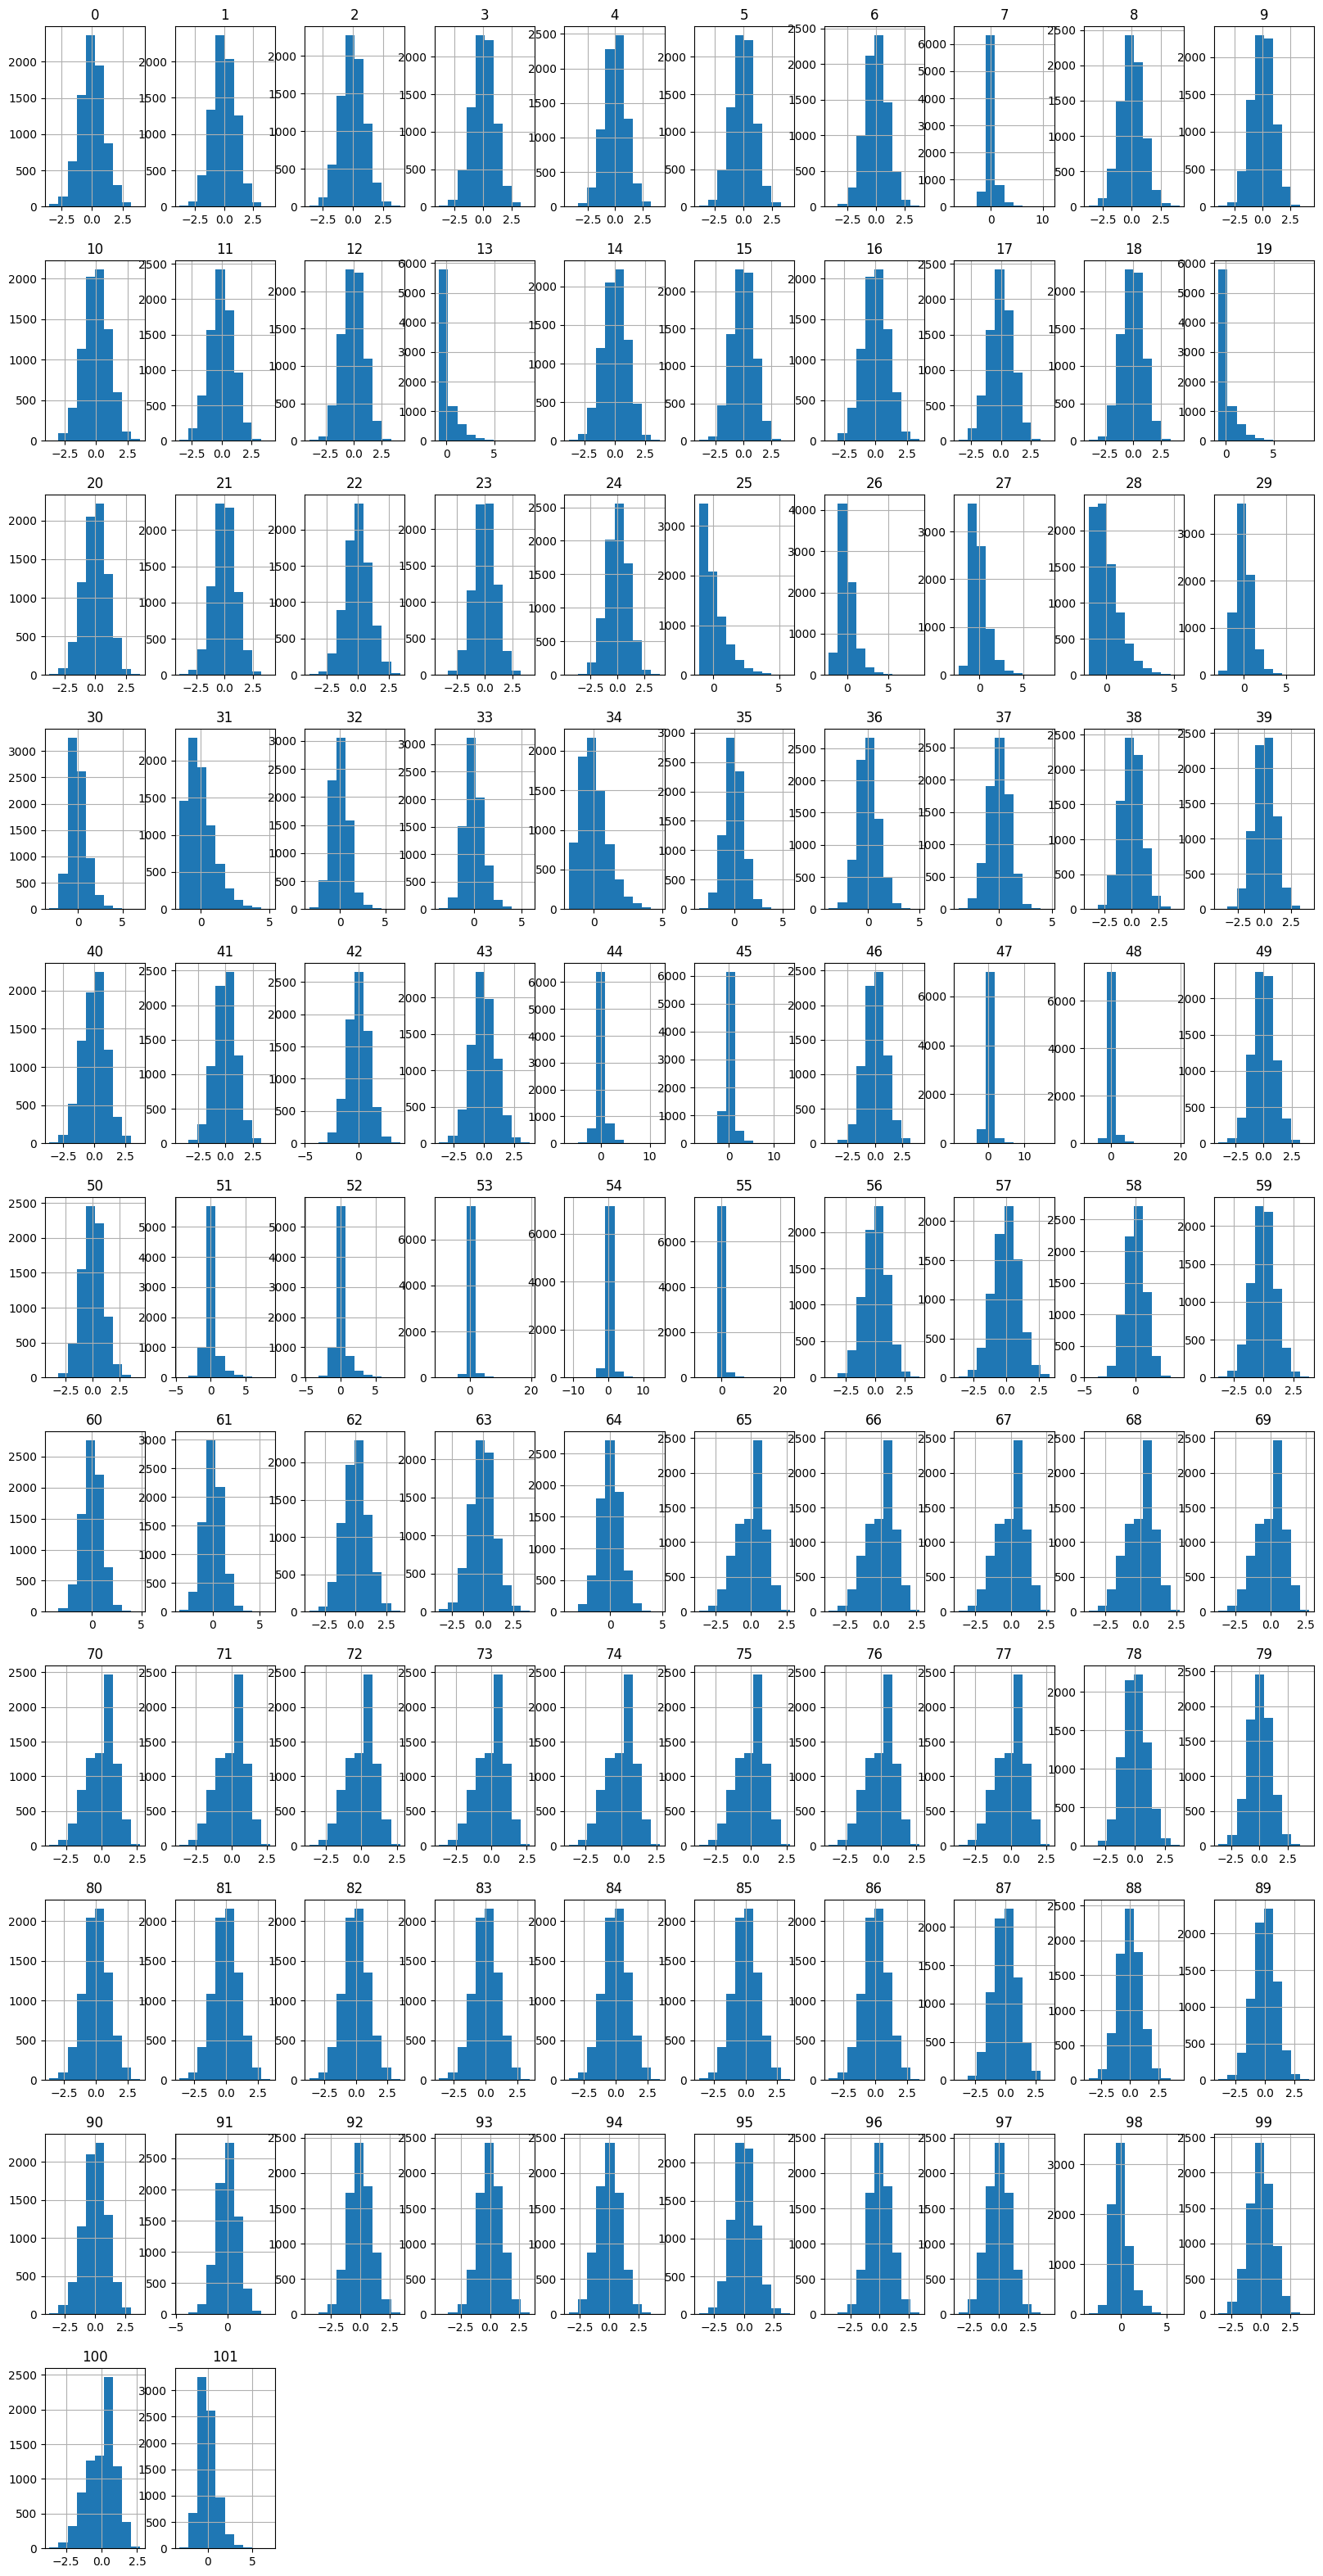

In [106]:
temp_scaled_df.hist(figsize=(20, 40))
plt.show()

In [ ]:
# range of number of n component values = combinations of features that we will ge from PCA
#[*range(2, len(X_train.columns) -1)]

In [109]:
fit_pca = {}
for component in [*range(2, len(X_train.columns) -1)]:
    pca = PCA(n_components = component)
    pca.fit(scaled_data)
    fit_pca[component] = pca

In [110]:
fit_pca

{2: PCA(n_components=2),
 3: PCA(n_components=3),
 4: PCA(n_components=4),
 5: PCA(n_components=5),
 6: PCA(n_components=6),
 7: PCA(n_components=7),
 8: PCA(n_components=8),
 9: PCA(n_components=9),
 10: PCA(n_components=10),
 11: PCA(n_components=11),
 12: PCA(n_components=12),
 13: PCA(n_components=13),
 14: PCA(n_components=14),
 15: PCA(n_components=15),
 16: PCA(n_components=16),
 17: PCA(n_components=17),
 18: PCA(n_components=18),
 19: PCA(n_components=19),
 20: PCA(n_components=20),
 21: PCA(n_components=21),
 22: PCA(n_components=22),
 23: PCA(n_components=23),
 24: PCA(n_components=24),
 25: PCA(n_components=25),
 26: PCA(n_components=26),
 27: PCA(n_components=27),
 28: PCA(n_components=28),
 29: PCA(n_components=29),
 30: PCA(n_components=30),
 31: PCA(n_components=31),
 32: PCA(n_components=32),
 33: PCA(n_components=33),
 34: PCA(n_components=34),
 35: PCA(n_components=35),
 36: PCA(n_components=36),
 37: PCA(n_components=37),
 38: PCA(n_components=38),
 39: PCA(n_compon

## Evaluating Components using a Scree Plot

In [111]:
scaled_data[0].shape

(102,)

In [112]:
fit_pca[5].transform(scaled_data).shape

(7892, 5)

In [113]:
fit_pca[5].transform(scaled_data)

array([[-1.32661076, -0.79581777, -1.65664418, -0.90313737,  2.92947146],
       [ 8.98585956,  9.78834747, -3.09947055, -0.75681405, -3.32130024],
       [ 8.01121889,  3.76629303, -2.64781452, -2.5651982 , -2.16307606],
       ...,
       [-1.37916074,  2.3596989 , -3.45131806, -2.24440524,  2.71374226],
       [-2.16374665,  2.67417513, -1.85842736,  0.37967924, -2.99641162],
       [-4.2918477 ,  4.64785492, -2.36071798, -0.30725533,  2.58783884]])

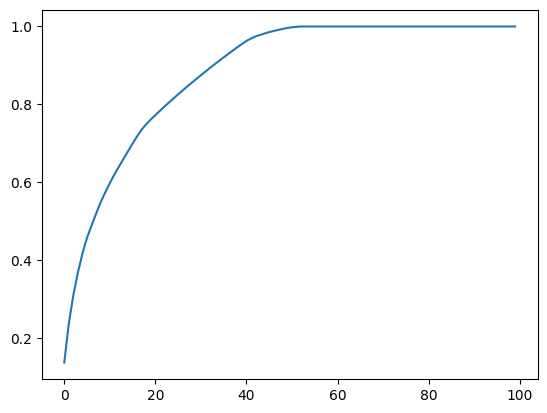

In [114]:
plt.plot(fit_pca[100].explained_variance_ratio_.cumsum())
plt.show()
# based on the graph I will use 50 components since it has around 1.0 for explanied variance on y axis

# 6. Modelling

## Import Dependencies

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [116]:
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Create Pipelines and Grids

In [125]:
pipelines = {
    'sgd' : make_pipeline(StandardScaler(), PCA(n_components=50), SGDClassifier(random_state=1234)),
    'ridge' : make_pipeline(StandardScaler(), PCA(n_components=50), RidgeClassifier(random_state=1234)),
    'rf' : make_pipeline(StandardScaler(), PCA(n_components=50), RandomForestClassifier(random_state=1234)),
    'gb' : make_pipeline(StandardScaler(), PCA(n_components=50), GradientBoostingClassifier(random_state=1234))
}

In [126]:
pipelines['gb']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=50)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=1234))])

In [127]:
grid = {
    'sgd': {
        'sgdclassifier__alpha':[0.0001, 0.0001, 0.001, 0.01]
    },
    'ridge': {
        'ridgeclassifier__alpha':[0.01, 0.5, 1.0, 2.0, 3.0]
    }, 
    'rf':{
        'randomforestclassifier__n_estimators':[50,100,200,300,400], 
        'randomforestclassifier__max_depth':[None, 5, 7, 9]
    },
    'gb':{
        'gradientboostingclassifier__n_estimators':[50,100,200,300,400], 
        'gradientboostingclassifier__max_depth':[None, 5, 7, 9]
    }
}

## Train PCA Factored Models

In [122]:
y_train[:3]

0    Running
1    Running
2    Running
Name: Machine Failure, dtype: object

In [128]:
fit_models = {}
for algo, pipeline in pipelines.items(): 
    try: 
        # Train here
        print(f'Commencing training for {algo}')
        model = GridSearchCV(pipeline, grid[algo], cv=10, n_jobs=-1)
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print(f'Completed training for {algo}')

    except Exception as e:
        print(f'Something went wrong with algo {algo}: {e}') 

Commencing training for sgd
Completed training for sgd
Commencing training for ridge
Completed training for ridge
Commencing training for rf
Completed training for rf
Commencing training for gb
Completed training for gb


In [129]:
fit_models

{'sgd': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('pca', PCA(n_components=50)),
                                        ('sgdclassifier',
                                         SGDClassifier(random_state=1234))]),
              n_jobs=-1,
              param_grid={'sgdclassifier__alpha': [0.0001, 0.0001, 0.001, 0.01]}),
 'ridge': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('pca', PCA(n_components=50)),
                                        ('ridgeclassifier',
                                         RidgeClassifier(random_state=1234))]),
              n_jobs=-1,
              param_grid={'ridgeclassifier__alpha': [0.01, 0.5, 1.0, 2.0, 3.0]}),
 'rf': GridSearchCV(cv=10,
              estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                        ('pca', 

# 7. Evaluate

## Calculate Classification Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matr

In [131]:
# Loop through each algorithm
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    
    # replace target values with 1s and 0s
    y_test_bin = [1 if val== 'Failure' else 0 for val in y_test]
    yhat_bin = [1 if val== 'Failure' else 0 for val in yhat]
    
    # get scores for each model
    f1 = f1_score(y_test_bin, yhat_bin)
    precision = precision_score(y_test_bin, yhat_bin)
    recall = recall_score(y_test_bin, yhat_bin)
    print(f'{algo} scores: F1: {f1}, Precision: {precision}, Recall: {recall}')

sgd scores: F1: 0.9831775700934579, Precision: 0.9850187265917603, Recall: 0.9813432835820896
ridge scores: F1: 0.7204301075268817, Precision: 0.5630252100840336, Recall: 1.0
rf scores: F1: 0.8795620437956205, Precision: 0.8607142857142858, Recall: 0.8992537313432836
gb scores: F1: 0.9194991055456171, Precision: 0.8831615120274914, Recall: 0.9589552238805971


## Review Confusion Matrix

In [134]:
model = fit_models['sgd']

In [135]:
yhat = model.predict(X_test)
confusion_matrix(y_test, yhat, labels = ['Failure', 'Running'])

array([[ 263,    5],
       [   4, 1687]])

# 8. Deploy

## Save Model

In [136]:
import pickle

In [137]:
with open('sgd.pkl', 'wb') as f:
    pickle.dump(fit_models['sgd'], f)

## Load Model and PCA

In [138]:
with open('sgd.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [142]:
best_model.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=50)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.001, random_state=1234))])

## Call New Data to Be Scored

In [143]:
con = sqlite3.connect(DB_PATH)
cur = con.cursor()

In [144]:
ALL_DATA_STATEMENT = '''
    SELECT
        *
    FROM
        scoring
'''

In [145]:
res = cur.execute(ALL_DATA_STATEMENT)
scoring_data = res.fetchall()

In [147]:
scoring_data[0]

(0.585750267,
 0.710869607,
 0.961794667,
 0.535206619,
 1.327430447,
 5.352066187,
 2.22607639,
 -1.417258473,
 -0.713737924,
 8.562829403,
 16.39160088,
 4.951562638,
 -0.718585299,
 0.408525618,
 1.355492864,
 8.562829403,
 16.39160088,
 4.951562638,
 -0.718585299,
 0.408525618,
 1.355492864,
 3.428719582,
 1.106577233,
 1.11514823,
 1.323574168,
 10.11588308,
 10.11682425,
 10.14191431,
 14.2631577,
 14.26382522,
 14.28163167,
 17.45119609,
 17.45174167,
 17.46629841,
 20.14077511,
 20.14124784,
 20.1538621,
 7.780123508,
 3.931760705,
 0.584022231,
 1.122251072,
 1.327430447,
 0.226696568,
 0.448505463,
 0.870023899,
 0.3377122,
 1.327430447,
 0.088459375,
 0.151465766,
 4.114463499,
 0.393176071,
 0.134966025,
 0.134966025,
 0.245027471,
 0.218335698,
 0.007162028,
 7.584955892,
 0.680767942,
 0.936767115,
 1.848734853,
 5.897993892,
 7.07759267,
 0.680767942,
 0.379614982,
 2.326892699,
 7.07759267,
 8.493111204,
 10.19173345,
 12.23008013,
 14.67609616,
 17.61131539,
 21.133578

In [148]:
col = np.array(cur.description)[:,0]
scoring = pd.DataFrame(scoring_data, columns = col)
scoring.head()

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
0  0.585750  0.710870  0.961795  0.535207  1.327430   5.352066  2.226076   
1  1.394299  0.528989  0.403531  0.562596  1.060444   5.625960  1.060982   
2  2.269294  0.324147 -0.033710  2.277046 -0.041533  22.770459  2.366656   
3  1.246255  1.932317  2.315582  0.766818  1.328568   7.668182  3.359558   
4  0.325781  1.895224  0.821280  2.313757  0.544863  23.137572  0.278491   

    Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  Sensor 13  Sensor 14  \
0  -1.417258 -0.713738   8.562829  16.391601   4.951563  -0.718585   0.408526   
1   1.135943  1.141834  28.130973  16.001682  16.082543   9.065487   0.360202   
2 -13.778314 -1.534053  13.036520   8.225527   9.455773   1.518260   0.031488   
3   4.186759  0.975112  -0.464028  25.943124  23.510027  -5.232014   2.541832   
4   0.412551  0.384150  14.307797  20.886902  18.829649   2.153898   1.185246   

   Sensor 15  Sensor 16  Sensor 17  Sensor 18  Sensor 19  Sensor 20  \
0   1.355493   8.562829  16.391601   4.951563  -0.718585   0.408526   
1  -0.650075  28.130973  16.001682  16.082543   9.065487   0.360202   
2   2.747590  13.036520   8.225527   9.455773   1.518260   0.031488   
3   3.894417  -0.464028  25.943124  23.510027  -5.232014   2.541832   
4  -0.252336  14.307797  20.886902  18.829649   2.153898   1.185246   

   Sensor 21  Sensor 22  Sensor 23  Sensor 24  Sensor 25  Sensor 26  \
0   1.355493   3.428720   1.106577   1.115148   1.323574  10.115883   
1  -0.650075   0.192444   1.797040   1.277696   1.371443  10.248238   
2   2.747590   1.568347   1.828087   1.475856   1.306593  10.255242   
3   3.894417   0.453016   1.300736   0.337421   1.733865  10.148530   
4  -0.252336   0.661016   2.775032   0.861760   1.993013  10.510748   

   Sensor 27  Sensor 28  Sensor 29  Sensor 30  Sensor 31  Sensor 32  \
0  10.116824  10.141914  14.263158  14.263825  14.281632  17.451196   
1  10.170032  10.182234  14.381357  14.325732  14.334397  17.567597   
2  10.198345  10.175228  14.387428  14.346927  14.330505  17.573451   
3  10.070481  10.213081  14.293124  14.237813  14.339029  17.481251   
4  10.174363  10.331850  14.603111  14.362893  14.474880  17.777117   

   Sensor 33  Sensor 34  Sensor 35  Sensor 36  Sensor 37  Sensor 38  \
0  17.451742  17.466298  20.140775  20.141248  20.153862   7.780124   
1  17.522090  17.529175  20.258764  20.219314  20.225455   9.363277   
2  17.540308  17.526878  20.264606  20.235872  20.224231   1.819098   
3  17.436056  17.518804  20.171635  20.132481  20.204188  -4.488292   
4  17.580322  17.671932  20.464626  20.293909  20.373321  -4.851830   

   Sensor 39  Sensor 40  Sensor 41  Sensor 42  Sensor 43  Sensor 44  \
0   3.931761   0.584022   1.122251   1.327430   0.226697   0.448505   
1   6.417331  -0.873089   3.384624   1.060444   2.822146   1.955808   
2   8.536833  -0.251808   1.523031  -0.041533   1.108410  -0.494091   
3  -7.808930   0.312657   1.821963   1.328568   0.757372   0.502695   
4   1.652539  -1.558874   0.418813   0.544863   1.042305   0.346264   

   Sensor 45  Sensor 46  Sensor 47  Sensor 48  Sensor 49  Sensor 50  \
0   0.870024   0.337712   1.327430   0.088459   0.151466   4.114463   
1  -3.133696  10.129257   1.060444 -17.296672  19.810882   0.230933   
2   0.015928  -0.070114  -0.041533  -0.008723   0.034643   1.882017   
3   0.756819   1.833296   1.328568   0.288142   0.921589   0.543619   
4  -0.355729   0.237850   0.544863  -0.128387   0.082359   0.793219   

   Sensor 51  Sensor 52  Sensor 53  Sensor 54  Sensor 55  Sensor 56  \
0   0.393176   0.134966   0.134966   0.245027   0.218336   0.007162   
1   0.641733   5.853199   5.853199   2.935915   0.867427  21.985741   
2   0.853683   0.022746   0.022746   0.055659   0.036545   0.000442   
3  -0.780893   0.505822   0.505822  -0.391222  -0.214725  -0.199796   
4   0.165254   0.196648   0.196648   0.010796   0.025777   0.006390   

   Sensor 57  Sensor 58  Sensor 59  Sensor 60  Sensor 61  Sensor 62  \

## Make Predictions

In [149]:
yhat = best_model.predict(scoring) ; yhat

array(['Running', 'Running', 'Running', ..., 'Running', 'Running',
       'Running'], dtype='<U7')

In [150]:
scoring['Predictions'] = yhat

In [151]:
scoring.head()

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
0  0.585750  0.710870  0.961795  0.535207  1.327430   5.352066  2.226076   
1  1.394299  0.528989  0.403531  0.562596  1.060444   5.625960  1.060982   
2  2.269294  0.324147 -0.033710  2.277046 -0.041533  22.770459  2.366656   
3  1.246255  1.932317  2.315582  0.766818  1.328568   7.668182  3.359558   
4  0.325781  1.895224  0.821280  2.313757  0.544863  23.137572  0.278491   

    Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  Sensor 13  Sensor 14  \
0  -1.417258 -0.713738   8.562829  16.391601   4.951563  -0.718585   0.408526   
1   1.135943  1.141834  28.130973  16.001682  16.082543   9.065487   0.360202   
2 -13.778314 -1.534053  13.036520   8.225527   9.455773   1.518260   0.031488   
3   4.186759  0.975112  -0.464028  25.943124  23.510027  -5.232014   2.541832   
4   0.412551  0.384150  14.307797  20.886902  18.829649   2.153898   1.185246   

   Sensor 15  Sensor 16  Sensor 17  Sensor 18  Sensor 19  Sensor 20  \
0   1.355493   8.562829  16.391601   4.951563  -0.718585   0.408526   
1  -0.650075  28.130973  16.001682  16.082543   9.065487   0.360202   
2   2.747590  13.036520   8.225527   9.455773   1.518260   0.031488   
3   3.894417  -0.464028  25.943124  23.510027  -5.232014   2.541832   
4  -0.252336  14.307797  20.886902  18.829649   2.153898   1.185246   

   Sensor 21  Sensor 22  Sensor 23  Sensor 24  Sensor 25  Sensor 26  \
0   1.355493   3.428720   1.106577   1.115148   1.323574  10.115883   
1  -0.650075   0.192444   1.797040   1.277696   1.371443  10.248238   
2   2.747590   1.568347   1.828087   1.475856   1.306593  10.255242   
3   3.894417   0.453016   1.300736   0.337421   1.733865  10.148530   
4  -0.252336   0.661016   2.775032   0.861760   1.993013  10.510748   

   Sensor 27  Sensor 28  Sensor 29  Sensor 30  Sensor 31  Sensor 32  \
0  10.116824  10.141914  14.263158  14.263825  14.281632  17.451196   
1  10.170032  10.182234  14.381357  14.325732  14.334397  17.567597   
2  10.198345  10.175228  14.387428  14.346927  14.330505  17.573451   
3  10.070481  10.213081  14.293124  14.237813  14.339029  17.481251   
4  10.174363  10.331850  14.603111  14.362893  14.474880  17.777117   

   Sensor 33  Sensor 34  Sensor 35  Sensor 36  Sensor 37  Sensor 38  \
0  17.451742  17.466298  20.140775  20.141248  20.153862   7.780124   
1  17.522090  17.529175  20.258764  20.219314  20.225455   9.363277   
2  17.540308  17.526878  20.264606  20.235872  20.224231   1.819098   
3  17.436056  17.518804  20.171635  20.132481  20.204188  -4.488292   
4  17.580322  17.671932  20.464626  20.293909  20.373321  -4.851830   

   Sensor 39  Sensor 40  Sensor 41  Sensor 42  Sensor 43  Sensor 44  \
0   3.931761   0.584022   1.122251   1.327430   0.226697   0.448505   
1   6.417331  -0.873089   3.384624   1.060444   2.822146   1.955808   
2   8.536833  -0.251808   1.523031  -0.041533   1.108410  -0.494091   
3  -7.808930   0.312657   1.821963   1.328568   0.757372   0.502695   
4   1.652539  -1.558874   0.418813   0.544863   1.042305   0.346264   

   Sensor 45  Sensor 46  Sensor 47  Sensor 48  Sensor 49  Sensor 50  \
0   0.870024   0.337712   1.327430   0.088459   0.151466   4.114463   
1  -3.133696  10.129257   1.060444 -17.296672  19.810882   0.230933   
2   0.015928  -0.070114  -0.041533  -0.008723   0.034643   1.882017   
3   0.756819   1.833296   1.328568   0.288142   0.921589   0.543619   
4  -0.355729   0.237850   0.544863  -0.128387   0.082359   0.793219   

   Sensor 51  Sensor 52  Sensor 53  Sensor 54  Sensor 55  Sensor 56  \
0   0.393176   0.134966   0.134966   0.245027   0.218336   0.007162   
1   0.641733   5.853199   5.853199   2.935915   0.867427  21.985741   
2   0.853683   0.022746   0.022746   0.055659   0.036545   0.000442   
3  -0.780893   0.505822   0.505822  -0.391222  -0.214725  -0.199796   
4   0.165254   0.196648   0.196648   0.010796   0.025777   0.006390   

   Sensor 57  Sensor 58  Sensor 59  Sensor 60  Sensor 61  Sensor 62  \

## Check if Predictions Table Exists, If Not Create It

In [152]:
# check if table predictions exist

PREDICTIONS_TABLE = '''
    SELECT
        name
    FROM
        sqlite_master
    WHERE
        type="table"
    AND
        name="predictions";
'''

In [153]:
res = cur.execute(PREDICTIONS_TABLE)
tables = res.fetchall()

In [154]:
tables

[]

In [155]:
# Since the table does not exist, let's create a new table

cur.execute(f'CREATE TABLE predictions {tuple(scoring.columns)}')

In [156]:
#tuple(scoring.columns)

('Sensor 1',
 'Sensor 2',
 'Sensor 3',
 'Sensor 4',
 'Sensor 5',
 'Sensor 6',
 'Sensor 7',
 'Sensor 8',
 'Sensor 9',
 'Sensor 10',
 'Sensor 11',
 'Sensor 12',
 'Sensor 13',
 'Sensor 14',
 'Sensor 15',
 'Sensor 16',
 'Sensor 17',
 'Sensor 18',
 'Sensor 19',
 'Sensor 20',
 'Sensor 21',
 'Sensor 22',
 'Sensor 23',
 'Sensor 24',
 'Sensor 25',
 'Sensor 26',
 'Sensor 27',
 'Sensor 28',
 'Sensor 29',
 'Sensor 30',
 'Sensor 31',
 'Sensor 32',
 'Sensor 33',
 'Sensor 34',
 'Sensor 35',
 'Sensor 36',
 'Sensor 37',
 'Sensor 38',
 'Sensor 39',
 'Sensor 40',
 'Sensor 41',
 'Sensor 42',
 'Sensor 43',
 'Sensor 44',
 'Sensor 45',
 'Sensor 46',
 'Sensor 47',
 'Sensor 48',
 'Sensor 49',
 'Sensor 50',
 'Sensor 51',
 'Sensor 52',
 'Sensor 53',
 'Sensor 54',
 'Sensor 55',
 'Sensor 56',
 'Sensor 57',
 'Sensor 58',
 'Sensor 59',
 'Sensor 60',
 'Sensor 61',
 'Sensor 62',
 'Sensor 63',
 'Sensor 64',
 'Sensor 65',
 'Sensor 66',
 'Sensor 67',
 'Sensor 68',
 'Sensor 69',
 'Sensor 70',
 'Sensor 71',
 'Sensor 72',
 

In [157]:
# check if table was created
res = cur.execute(PREDICTIONS_TABLE)
tables = res.fetchall()

In [158]:
tables

[('predictions',)]

## Push back into Database

In [175]:
tups = [tuple(val) for val in scoring.values]
val_template = str('?,'*len(tups[0]))[:-1] #minus one to get rid of comma on val_template

In [176]:
tups

[(0.585750267,
  0.710869607,
  0.961794667,
  0.535206619,
  1.327430447,
  5.352066187,
  2.22607639,
  -1.417258473,
  -0.713737924,
  8.562829403,
  16.39160088,
  4.951562638,
  -0.718585299,
  0.408525618,
  1.355492864,
  8.562829403,
  16.39160088,
  4.951562638,
  -0.718585299,
  0.408525618,
  1.355492864,
  3.428719582,
  1.106577233,
  1.11514823,
  1.323574168,
  10.11588308,
  10.11682425,
  10.14191431,
  14.2631577,
  14.26382522,
  14.28163167,
  17.45119609,
  17.45174167,
  17.46629841,
  20.14077511,
  20.14124784,
  20.1538621,
  7.780123508,
  3.931760705,
  0.584022231,
  1.122251072,
  1.327430447,
  0.226696568,
  0.448505463,
  0.870023899,
  0.3377122,
  1.327430447,
  0.088459375,
  0.151465766,
  4.114463499,
  0.393176071,
  0.134966025,
  0.134966025,
  0.245027471,
  0.218335698,
  0.007162028,
  7.584955892,
  0.680767942,
  0.936767115,
  1.848734853,
  5.897993892,
  7.07759267,
  0.680767942,
  0.379614982,
  2.326892699,
  7.07759267,
  8.493111204,

In [177]:
# this represents 103 values that are feature values plus scoring values.  We need to get rid of comma at the end
val_template

'?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?'

In [179]:
cur.executemany(f'INSERT INTO predictions VALUES ({val_template})', tups)

## View Loaded Results

In [180]:
res = cur.execute('SELECT * FROM predictions')
predictions = res.fetchall()

In [181]:
predictions

[(0.585750267,
  0.710869607,
  0.961794667,
  0.535206619,
  1.327430447,
  5.352066187,
  2.22607639,
  -1.417258473,
  -0.713737924,
  8.562829403,
  16.39160088,
  4.951562638,
  -0.718585299,
  0.408525618,
  1.355492864,
  8.562829403,
  16.39160088,
  4.951562638,
  -0.718585299,
  0.408525618,
  1.355492864,
  3.428719582,
  1.106577233,
  1.11514823,
  1.323574168,
  10.11588308,
  10.11682425,
  10.14191431,
  14.2631577,
  14.26382522,
  14.28163167,
  17.45119609,
  17.45174167,
  17.46629841,
  20.14077511,
  20.14124784,
  20.1538621,
  7.780123508,
  3.931760705,
  0.584022231,
  1.122251072,
  1.327430447,
  0.226696568,
  0.448505463,
  0.870023899,
  0.3377122,
  1.327430447,
  0.088459375,
  0.151465766,
  4.114463499,
  0.393176071,
  0.134966025,
  0.134966025,
  0.245027471,
  0.218335698,
  0.007162028,
  7.584955892,
  0.680767942,
  0.936767115,
  1.848734853,
  5.897993892,
  7.07759267,
  0.680767942,
  0.379614982,
  2.326892699,
  7.07759267,
  8.493111204,

In [183]:
sql_columns = np.array(cur.description)[:,0]
sql_predictions = pd.DataFrame(predictions, columns=sql_columns)

In [187]:
sql_predictions.tail()

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
2148  0.881909  2.160381  0.198874  0.528587  2.929006   5.285871 -0.149039   
2149  2.057214  0.904536  0.028225  1.553294 -0.967447  15.532938  1.853190   
2150  2.600971 -1.336006  2.951594  2.547870  2.756117  25.478697  0.066346   
2151  1.170571  0.347656  1.484250  0.527953  0.595716   5.279533  1.597344   
2152  1.701952 -0.342722 -0.520516  0.983608  2.130481   9.836081  0.479025   

      Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  Sensor 13  \
2148 -0.044315  0.337509  41.450987  16.879789   5.306023  15.725494   
2149  2.077073  0.432942 -22.393528   5.266349  -6.533873 -16.196764   
2150 -0.150740 -0.535041  42.708971   3.822863   0.932315  16.354486   
2151  2.290511  1.629632  31.414412   5.769107  21.229727  10.707206   
2152 -0.199829 -0.254466  14.446206  34.880596  -6.741098   2.223103   

      Sensor 14  Sensor 15  Sensor 16  Sensor 17  Sensor 18  Sensor 19  \
2148   0.473315   1.563288  41.450987  16.879789   5.306023  15.725494   
2149   0.224075   1.836146 -22.393528   5.266349  -6.533873 -16.196764   
2150   0.381570  -1.046638  42.708971   3.822863   0.932315  16.354486   
2151   0.179005   1.106865  31.414412   5.769107  21.229727  10.707206   
2152   6.190441   3.335774  14.446206  34.880596  -6.741098   2.223103   

      Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  Sensor 25  \
2148   0.473315   1.563288   1.576230   0.426899   0.902150   0.093781   
2149   0.224075   1.836146   2.617073   0.847236  -0.851278   1.346062   
2150   0.381570  -1.046638  -0.142057   2.076239   1.895931   0.820064   
2151   0.179005   1.106865  -0.326894   0.236993   3.253152   0.975749   
2152   6.190441   3.335774  -0.218264   1.781184   0.709043   0.914619   

      Sensor 26  Sensor 27  Sensor 28  Sensor 29  Sensor 30  Sensor 31  \
2148  10.030411  10.061847  10.021761  14.178718  14.200974  14.172600   
2149  10.077948  10.078289  10.132084  14.227167  14.227408  14.265565   
2150  10.314408  10.279630  10.136506  14.438256  14.413432  14.311708   
2151  10.014647  10.527107  10.059278  14.160867  14.527800  14.192465   
2152  10.244696  10.113552  10.130040  14.378282  14.285136  14.296814   

      Sensor 32  Sensor 33  Sensor 34  Sensor 35  Sensor 36  Sensor 37  \
2148  17.362688  17.380868  17.357693  20.047190  20.062938  20.042864   
2149  17.414348  17.414545  17.445733  20.102407  20.102577  20.129601   
2150  17.622131  17.601797  17.518596  20.312945  20.295308  20.223191   
2151  17.342639  17.643525  17.368450  20.025088  20.286226  20.047445   
2152  17.564628  17.488462  17.498002  20.255798  20.189787  20.198051   

      Sensor 38  Sensor 39  Sensor 40  Sensor 41  Sensor 42  Sensor 43  \
2148   1.996798   1.833022   0.135401   0.690961   2.929006   0.385640   
2149  -0.520318   8.945192   0.174871   1.392910  -0.967447  -1.125559   
2150   0.575269  -2.578588   1.316769   0.891304   2.756117   0.165153   
2151   1.198203   4.908078   1.496556   1.198844   0.595716   1.232862   
2152   7.933902  -0.387274   0.639406   2.391283   2.130481  -0.667490   

      Sensor 44  Sensor 45  Sensor 46  Sensor 47  Sensor 48  Sensor 49  \
2148   1.366681   0.274028   0.780469   2.929006   0.144425   1.066652   
2149   0.533770  -0.235650   1.516764  -0.967447   0.141576   0.809604   
2150   0.309685   3.234691   0.405705   2.756117   0.165440   0.125641   
2151   1.113876   1.068796   0.880474   0.595716   1.467731   0.980739   
2152   1.788825   3.257509  -3.400583   2.130481  -3.889540  -6.083049   

      Sensor 50  Sensor 51  Sensor 52  Sensor 53  Sensor 54  Sensor 55  \
2148   1.891476   0.183302   1.543723   1.543723   0.369821   0.535227   
2149   3.140488   0.894519   0.581232   0.581232   2.274361   1.632813   
2150  -0.170469  -0.257859   0.140963   0.140963   0.005523   0.006196   
2151  -0.392273   0.490808   0.818070   0.818070  -0.188822  -0.157504   
2152  -0.261917  -0.038727  -2.543843  -2.543843  -0.06170

In [188]:
scoring.tail()

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5   Sensor 6  Sensor 7  \
2148  0.881909  2.160381  0.198874  0.528587  2.929006   5.285871 -0.149039   
2149  2.057214  0.904536  0.028225  1.553294 -0.967447  15.532938  1.853190   
2150  2.600971 -1.336006  2.951594  2.547870  2.756117  25.478697  0.066346   
2151  1.170571  0.347656  1.484250  0.527953  0.595716   5.279533  1.597344   
2152  1.701952 -0.342722 -0.520516  0.983608  2.130481   9.836081  0.479025   

      Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  Sensor 13  \
2148 -0.044315  0.337509  41.450987  16.879789   5.306023  15.725494   
2149  2.077073  0.432942 -22.393528   5.266349  -6.533873 -16.196764   
2150 -0.150740 -0.535041  42.708971   3.822863   0.932315  16.354486   
2151  2.290511  1.629632  31.414412   5.769107  21.229727  10.707206   
2152 -0.199829 -0.254466  14.446206  34.880596  -6.741098   2.223103   

      Sensor 14  Sensor 15  Sensor 16  Sensor 17  Sensor 18  Sensor 19  \
2148   0.473315   1.563288  41.450987  16.879789   5.306023  15.725494   
2149   0.224075   1.836146 -22.393528   5.266349  -6.533873 -16.196764   
2150   0.381570  -1.046638  42.708971   3.822863   0.932315  16.354486   
2151   0.179005   1.106865  31.414412   5.769107  21.229727  10.707206   
2152   6.190441   3.335774  14.446206  34.880596  -6.741098   2.223103   

      Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  Sensor 25  \
2148   0.473315   1.563288   1.576230   0.426899   0.902150   0.093781   
2149   0.224075   1.836146   2.617073   0.847236  -0.851278   1.346062   
2150   0.381570  -1.046638  -0.142057   2.076239   1.895931   0.820064   
2151   0.179005   1.106865  -0.326894   0.236993   3.253152   0.975749   
2152   6.190441   3.335774  -0.218264   1.781184   0.709043   0.914619   

      Sensor 26  Sensor 27  Sensor 28  Sensor 29  Sensor 30  Sensor 31  \
2148  10.030411  10.061847  10.021761  14.178718  14.200974  14.172600   
2149  10.077948  10.078289  10.132084  14.227167  14.227408  14.265565   
2150  10.314408  10.279630  10.136506  14.438256  14.413432  14.311708   
2151  10.014647  10.527107  10.059278  14.160867  14.527800  14.192465   
2152  10.244696  10.113552  10.130040  14.378282  14.285136  14.296814   

      Sensor 32  Sensor 33  Sensor 34  Sensor 35  Sensor 36  Sensor 37  \
2148  17.362688  17.380868  17.357693  20.047190  20.062938  20.042864   
2149  17.414348  17.414545  17.445733  20.102407  20.102577  20.129601   
2150  17.622131  17.601797  17.518596  20.312945  20.295308  20.223191   
2151  17.342639  17.643525  17.368450  20.025088  20.286226  20.047445   
2152  17.564628  17.488462  17.498002  20.255798  20.189787  20.198051   

      Sensor 38  Sensor 39  Sensor 40  Sensor 41  Sensor 42  Sensor 43  \
2148   1.996798   1.833022   0.135401   0.690961   2.929006   0.385640   
2149  -0.520318   8.945192   0.174871   1.392910  -0.967447  -1.125559   
2150   0.575269  -2.578588   1.316769   0.891304   2.756117   0.165153   
2151   1.198203   4.908078   1.496556   1.198844   0.595716   1.232862   
2152   7.933902  -0.387274   0.639406   2.391283   2.130481  -0.667490   

      Sensor 44  Sensor 45  Sensor 46  Sensor 47  Sensor 48  Sensor 49  \
2148   1.366681   0.274028   0.780469   2.929006   0.144425   1.066652   
2149   0.533770  -0.235650   1.516764  -0.967447   0.141576   0.809604   
2150   0.309685   3.234691   0.405705   2.756117   0.165440   0.125641   
2151   1.113876   1.068796   0.880474   0.595716   1.467731   0.980739   
2152   1.788825   3.257509  -3.400583   2.130481  -3.889540  -6.083049   

      Sensor 50  Sensor 51  Sensor 52  Sensor 53  Sensor 54  Sensor 55  \
2148   1.891476   0.183302   1.543723   1.543723   0.369821   0.535227   
2149   3.140488   0.894519   0.581232   0.581232   2.274361   1.632813   
2150  -0.170469  -0.257859   0.140963   0.140963   0.005523   0.006196   
2151  -0.392273   0.490808   0.818070   0.818070  -0.188822  -0.157504   
2152  -0.261917  -0.038727  -2.543843  -2.543843  -0.06170